In [1]:
import os
import pandas as pd
from math import ceil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker
import datetime


threshold = 1000

In [2]:
# Load Data
def load_raw(fn):
    datapath = os.path.join('../csse_covid_19_data/csse_covid_19_time_series/', fn)

    #datapath = '../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
    
    raw = pd.read_csv(datapath)
    del raw['Lat']
    del raw['Long']
    raw = raw.replace('Mainland China','China')
    return raw

def load_raw_us(fn):
    datapath = os.path.join('../csse_covid_19_data/csse_covid_19_time_series/', fn)

    #datapath = '../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
    
    raw = pd.read_csv(datapath)    
    return raw

raw = load_raw('time_series_covid19_confirmed_global.csv')
raw_deaths = load_raw('time_series_covid19_deaths_global.csv')
raw


Province/State         Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  \
0              NaN            Afghanistan        0        0        0        0   
1              NaN                Albania        0        0        0        0   
2              NaN                Algeria        0        0        0        0   
3              NaN                Andorra        0        0        0        0   
4              NaN                 Angola        0        0        0        0   
..             ...                    ...      ...      ...      ...      ...   
261            NaN  Sao Tome and Principe        0        0        0        0   
262            NaN                  Yemen        0        0        0        0   
263            NaN                Comoros        0        0        0        0   
264            NaN             Tajikistan        0        0        0        0   
265            NaN                Lesotho        0        0        0        0   

     1/26/20  1/27/20  1/28/20  1/29/20  ...  6/27/20  6/28/20  6/29/20  \
0          0        0        0        0  ...    30616    30967    31238   
1          0        0        0        0  ...     2330     2402     2466   
2          0        0        0        0  ...    12968    13273    13571   
3          0        0        0        0  ...      855      855      855   
4          0        0        0        0  ...      259      267      276   
..       ...      ...      ...      ...  ...      ...      ...      ...   
261        0        0        0        0  ...      713      713      713   
262        0        0        0        0  ...     1103     1118     1128   
263        0        0        0        0  ...      272      272      272   
264        0        0        0        0  ...     5799     5849     5900   
265        0        0        0        0  ...       24       27       27   

     6/30/20  7/1/20  7/2/20  7/3/20  7/4/20  7/5/20  7/6/20  
0      31517   31836   32022   32324   32672   32951   33190  
1       2535    2580    2662    2752    2819    2893    2964  
2      13907   14272   14657   15070   15500   15941   16404  
3        855     855     855     855     855     855     855  
4        284     291     315     328     346     346     346  
..       ...     ...     ...     ...     ...     ...     ...  
261      714     715     717     719     719     720     721  
262     1158    1190    1221    1240    1248    1265    1284  
263      303     303     303     309     309     311     311  
264     5900    6005    6058    6058    6159    6213    6262  
265       27      35      35      35      35      79      91  

[266 rows x 169 columns]

Province/State Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  \
49           Anhui          China        1        9       15       39   
50         Beijing          China       14       22       36       41   
51       Chongqing          China        6        9       27       57   
52          Fujian          China        1        5       10       18   
53           Gansu          China        0        2        2        4   
54       Guangdong          China       26       32       53       78   
55         Guangxi          China        2        5       23       23   
56         Guizhou          China        1        3        3        4   
57          Hainan          China        4        5        8       19   
58           Hebei          China        1        1        2        8   
59    Heilongjiang          China        0        2        4        9   
60           Henan          China        5        5        9       32   
61       Hong Kong          China        0        2        2        5   
62           Hubei          China      444      444      549      761   
63           Hunan          China        4        9       24       43   
64  Inner Mongolia          China        0        0        1        7   
65         Jiangsu          China        1        5        9       18   
66         Jiangxi          China        2        7       18       18   
67           Jilin          China        0        1        3        4   
68        Liaoning          China        2        3        4       17   
69           Macau          China        1        2        2        2   
70         Ningxia          China        1        1        2        3   
71         Qinghai          China        0        0        0        1   
72         Shaanxi          China        0        3        5       15   
73        Shandong          China        2        6       15       27   
74        Shanghai          China        9       16       20       33   
75          Shanxi          China        1        1        1        6   
76         Sichuan          China        5        8       15       28   
77         Tianjin          China        4        4        8       10   
78           Tibet          China        0        0        0        0   
79        Xinjiang          China        0        2        2        3   
80          Yunnan          China        1        2        5       11   
81        Zhejiang          China       10       27       43       62   

    1/26/20  1/27/20  1/28/20  1/29/20  ...  6/27/20  6/28/20  6/29/20  \
49       60       70      106      152  ...      991      991      991   
50       68       80       91      111  ...      905      912      919   
51       75      110      132      147  ...      582      582      582   
52       35       59       80       84  ...      363      363      363   
53        7       14       19       24  ...      163      163      164   
54      111      151      207      277  ...     1637     1637     1641   
55       36       46       51       58  ...      254      254      254   
56        5        7        9        9  ...      147      147      147   
57       22       33       40       43  ...      171      171      171   
58       13       18       33       48  ...      349      349      349   
59       15       21       33       38  ...      947      947      947   
60       83      128      168      206  ...     1276     1276     1276   
61        8        8        8       10  ...     1197     1199     1203   
62     1058     1423     3554     3554  ...    68135    68135    68135   
63       69      100      143      221  ...     1019     1019     1019   
64        7       11       15       16  ...      238      238      238   
65       33       47       70       99  ...      654      654      654   
66       36       72      109      109  ...      932      932      932   
67        4        6        8        9  ...      155      155      155   
68       21       27       34       39  .

In [56]:
# Shift all the series
def shift(df, threshold=1000):
    maxDate = max(df.index)    
    for c in df.columns:
        for i,a in enumerate(df[c]):        
            if i==0 and a>threshold:
                df[c]=df[c].shift(4) # hack to push out china
                break
            if a>=threshold:
                df[c]=df[c].shift(-i)            
                break
    df=df.reset_index(drop=True)
    #del df['China']
    return df


In [57]:
%matplotlib inline
from math import pow


def plotdataframe(df, logy=False, legend=True):
    plt.rcParams["figure.figsize"] = [10, 10]
    fig, ax = plt.subplots()
    markers = [item for sublist in ['oxds+*']*ceil(len(df.columns)/5) for item in sublist]    
    for c,m in zip(df,markers):
        df[c].plot(logy=logy, marker=m, fontsize=12,ax=ax, linewidth=2.5)
    
    font = font_manager.FontProperties(family='sans-serif',
                                   weight='normal',
                                   style='normal', size=12)
    legend and ax.legend(prop=font)

    return ax

def plotdataframe_point(df, logy=False, legend=True, legend_loc='best', title=None):
    plt.rcParams["figure.figsize"] = [10, 10]
    fig, ax = plt.subplots()
    markers = [item for sublist in ['oxds+*']*ceil(len(df.columns)/5) for item in sublist]    
    lines = []
    legendcols = []
    maxX = max([max([x for c in df for (x,y) in zip(df.index,df[c]) if y>0])])
    #print(maxX)
    for c,m in zip(df,markers):
        pts = list([x for (x,y) in zip(df.index,df[c]) if y>0])
        ys = list([x for x in df[c] if x>0])
        if len(pts)<=1:
            continue
        legendcols.append(c)
        df[c].plot(logy=logy, marker=m, fontsize=12,ax=ax, linewidth=1) #, color='#999999')
        
        offset = (10,0)
        #print([pts[0],pts[-1]],[ys[0],ys[-1]])
        #l,=ax.plot([pts[0],pts[-1]],[ys[0],ys[-1]], linewidth=2.5, marker=m)
        #lines.append(l)
        #growth = round((pow(ys[-1]/ys[0],1.0/(pts[-1]-pts[0]))-1)*100)
        growth = round((pow(ys[-1]/ys[-8],1.0/(pts[-1]-pts[-8]))-1)*100)
        
        alignment = 'left'
        if pts[-1]>0.9*maxX:
            offset = (0,5)
            alignment = 'center'
        ax.annotate('{} ({}%)'.format(c,growth), xy=(pts[-1],ys[-1]), xytext=offset, textcoords='offset points', ha=alignment, size=12)
    
    if logy:
        ax.get_yaxis().set_major_formatter(
            ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    font = font_manager.FontProperties(family='sans-serif',
                                   weight='normal',
                                   style='normal', size=12)
    legend and ax.legend(lines,legendcols,prop=font, loc=legend_loc)

    title and ax.set_title(title, size=14)
    return ax

def save_figure(maxDate, filename):
    savedir = os.path.join('data',maxDate.strftime('%Y%m%d'))
    if not os.path.isdir(savedir):
        os.makedirs(savedir)
    plt.savefig(os.path.join(savedir,filename))


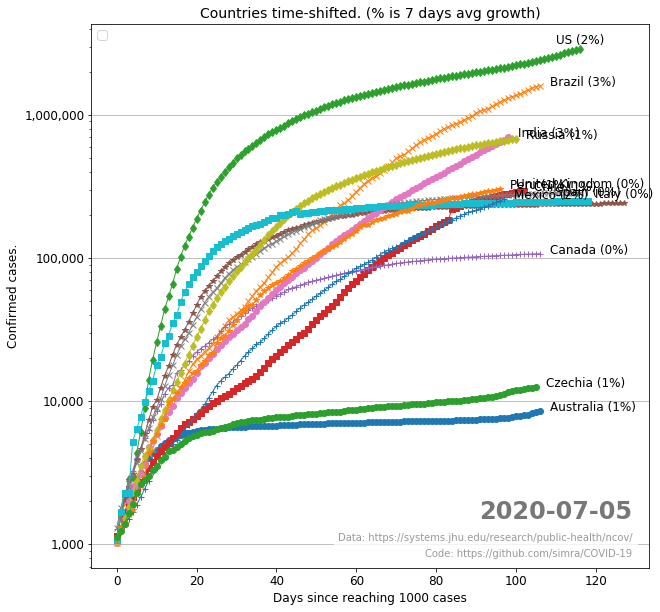

In [58]:
df=raw.groupby('Country/Region').sum()
last_date = list(df.columns)[-1]

df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)

df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
    #del df['Cruise Ship']

threshold = 1000
del df['China']
columnsToSelect = list(set(list(sorted(df.columns, key=lambda c: max(df[c]), reverse=True))[:10]+['Canada','Australia','Czechia']))
#print(columns)
#df = df[[c for c in df.columns if df[c].max()>12000 or c in ['Canada','US', 'Australia','Czechia']]]
df=df[columnsToSelect]
maxDate = max(df.index)
df = shift(df)

ax=plotdataframe_point(df, logy=True, legend_loc='upper left', title='Countries time-shifted. (% is 7 days avg growth)')
ax.set_xlabel("Days since reaching {} cases".format(threshold), size=12)
ax.set_ylabel("Confirmed cases." , size=12)
ax.grid(axis='y')
ax.text(0.97, 0.09, maxDate.strftime('%Y-%m-%d'), transform=ax.transAxes, color='#777777', size=24, ha='right', weight=800)
ax.text(0.97, 0.05, 'Data: https://systems.jhu.edu/research/public-health/ncov/', transform=ax.transAxes, ha='right', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
ax.text(0.97, 0.02, 'Code: https://github.com/simra/COVID-19', transform=ax.transAxes, ha='right', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
save_figure(maxDate,'1_countryshift.png')



Removed:  ['Albania', 'Andorra', 'Antigua and Barbuda', 'Armenia', 'Austria', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brunei', 'Bulgaria', 'Burma', 'Cabo Verde', 'Central African Republic', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Fiji', 'Finland', 'Gabon', 'Gambia', 'Georgia', 'Grenada', 'Guinea-Bissau', 'Guyana', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Jamaica', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'MS Zaandam', 'Maldives', 'Malta', 'Mauritania', 'Mauritius', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Namibia', 'New Zealand', 'Nicaragua', 'North Macedonia', 'Norway', 'Oman', 'Panama', 'Papua

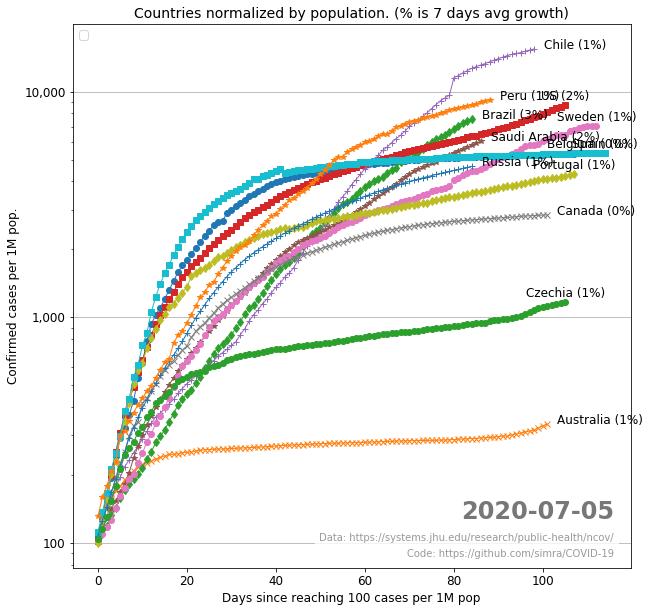

In [59]:
# Try normalizing by population
# https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv
wpp = pd.read_csv('../wpp/WPP2019_TotalPopulationBySex.csv')
wpp=wpp[(wpp['Time']==2020) & (wpp['Variant']=='Medium')]
wpp = dict(zip(wpp['Location'],wpp['PopTotal']))
wpp['Iran']=wpp['Iran (Islamic Republic of)']
wpp['US']=wpp['United States of America']
wpp['Korea, South']= wpp['Republic of Korea']
wpp['Russia'] = wpp['Russian Federation']

df=raw.groupby('Country/Region').sum()
last_date = list(df.columns)[-1]

df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)

df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
    #del df['Cruise Ship']

columnsRemoved = [c for c in df.columns if c not in wpp or wpp[c]<10000]
columnsFiltered = [c for c in df.columns if c in wpp and wpp[c]>=10000]
df = df[columnsFiltered]
print("Removed: ",columnsRemoved)

#df = df[[c for c in df.columns if df[c].max()>10000 or c in ['Canada','US', 'Australia', 'Czechia']]]
for c in df.columns:
    df[c] = df[c]*1000/wpp[c]
#df = df[[c for c in df.columns if df[c].max()>1000 or c in ['Canada','US', 'Australia', 'Czechia']]]
columnsToSelect = list(set(list(sorted(df.columns, key=lambda c: max(df[c]), reverse=True))[:10]+['Canada','US','Australia','Czechia']))
df=df[columnsToSelect]


#plotdataframe(df, logy=True)
maxDate = max(df.index)
threshold = 100
df= shift(df,threshold=threshold)

ax=plotdataframe_point(df, logy=True, legend_loc='upper left', title="Countries normalized by population. (% is 7 days avg growth)")
ax.set_xlabel("Days since reaching {} cases per 1M pop".format(threshold), size=12)
ax.set_ylabel("Confirmed cases per 1M pop." , size=12)
ax.grid(axis='y')
ax.text(0.97, 0.09, maxDate.strftime('%Y-%m-%d'), transform=ax.transAxes, color='#777777', size=24, ha='right', weight=800)
ax.text(0.97, 0.05, 'Data: https://systems.jhu.edu/research/public-health/ncov/', transform=ax.transAxes, ha='right', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
ax.text(0.97, 0.02, 'Code: https://github.com/simra/COVID-19', transform=ax.transAxes, ha='right', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
save_figure(maxDate,'2_countryshift_norm.png')

#wpp

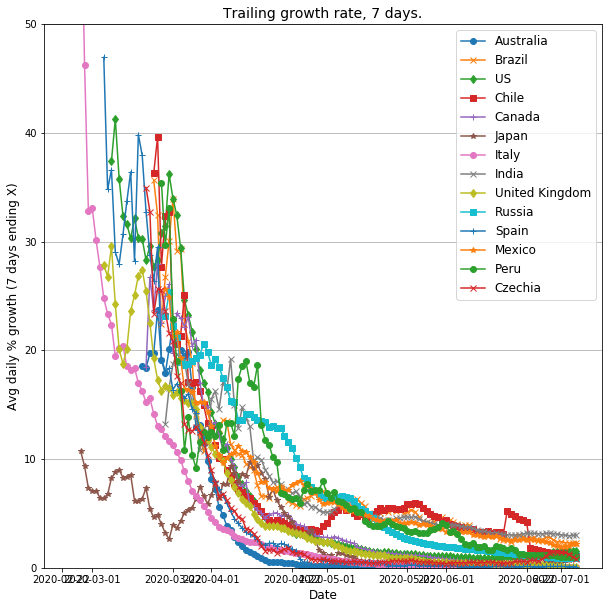

In [60]:
df=raw.groupby('Country/Region').sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]

#df = df[(df.index.isin(['Canada','Japan', 'Australia'])) | (df[last_date]>20000)]

df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)

df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
#del df['Cruise Ship']

columnsToSelect = list(set(list(sorted(df.columns, key=lambda c: max(df[c]), reverse=True))[:10]+['Canada','Australia','Japan','Czechia']))
df = df[columnsToSelect]

maxDate=max(df.index)

plt.rcParams["figure.figsize"] = [10, 10]
fig, ax = plt.subplots()
growth = {}
markers = [item for sublist in ['oxds+*']*ceil(len(df.columns)/5) for item in sublist]    
for c,m in zip(df.columns,markers):
    growth[c] = [(pow(df[c][i]/max(1.0,df[c][i-6]),1.0/7)-1)*100 if df[c][i]>200 else float('nan') for i in range(20,len(df[c]))]
    #growth[c] = [growth[c][i] if growth[c][i]<100 else float('nan') for i in range(len(growth[c]))]
    #if c=='France':
    #    print(list(df[c]))
    ax.plot(df.index[20:], growth[c], marker=m)

    
font = font_manager.FontProperties(family='sans-serif',
                                   weight='normal',
                                   style='normal', size=12)


ax.grid(axis='y') 
#ax.yaxis.set_label_position("right")
ax.set_ylim([0,50])
ax.set_xlabel('Date', size=12)
ax.set_ylabel('Avg daily % growth (7 days ending X)', size=12)
ax.set_title('Trailing growth rate, 7 days.', size=14)
ax.legend(df.columns, prop=font)    
#plt.ylim((0,100))
save_figure(maxDate,'3_growth.png')

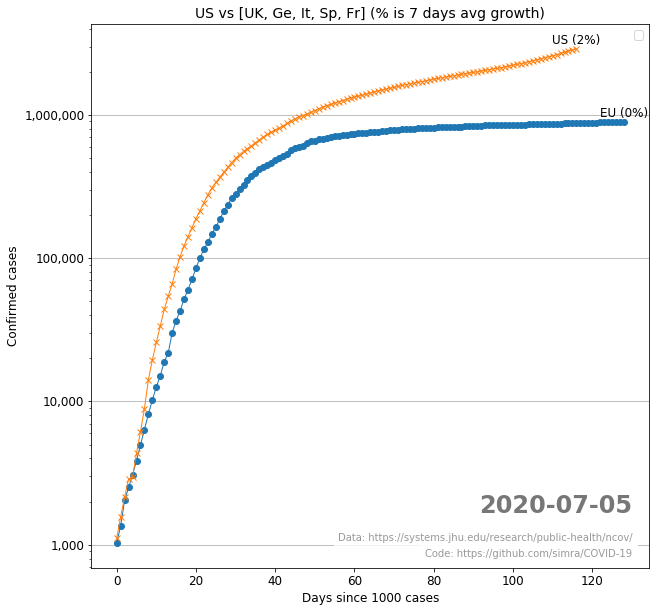

In [61]:
df=raw.groupby('Country/Region').sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]

#df = df[(df.index.isin(['Canada','Japan'])) | (df[last_date]>4000)]
df = df[df.index.isin(['US','France','Germany','Italy','Spain', 'UK'])]
df = df.groupby(df.index=='US').sum()
df.index = ['US' if c else 'EU' for c in df.index]
df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)

df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
#del df['Cruise Ship']
maxDate = max(df.index)
threshold = 1000
df=shift(df,threshold=threshold)
ax=plotdataframe_point(df, logy=True)

ax.set_xlabel('Days since {} cases'.format(threshold), size=12)
ax.set_ylabel('Confirmed cases', size=12)
ax.grid(axis='y')
ax.set_title('US vs [UK, Ge, It, Sp, Fr] (% is 7 days avg growth)', size=14)
ax.text(0.97, 0.1, maxDate.strftime('%Y-%m-%d'), transform=ax.transAxes, color='#777777', size=24, ha='right', weight=800)
ax.text(0.97, 0.05, 'Data: https://systems.jhu.edu/research/public-health/ncov/', transform=ax.transAxes, ha='right', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
ax.text(0.97, 0.02, 'Code: https://github.com/simra/COVID-19', transform=ax.transAxes, ha='right', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))

save_figure(maxDate, '6_euus.png')

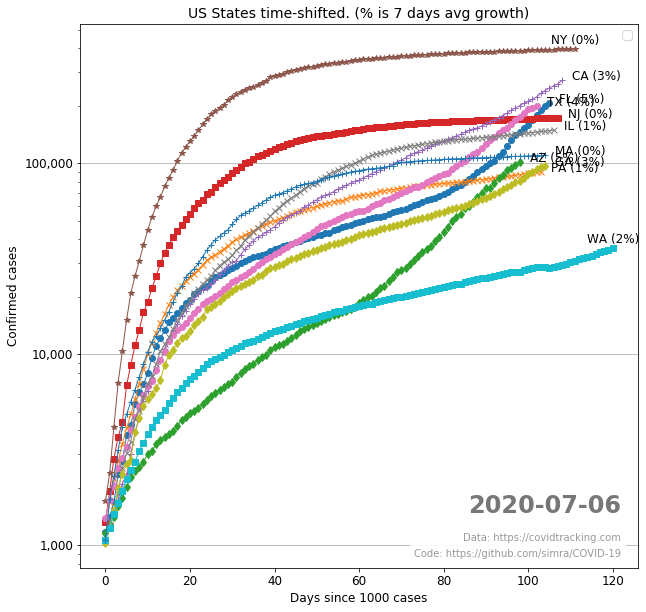

In [62]:
covidtracking = pd.read_csv('../other3p/covidtracking_daily.csv')
covidtracking['date'] = pd.to_datetime(covidtracking['date'],format="%Y%m%d")
maxDate = max(covidtracking['date'])
df = covidtracking.pivot(index='date',columns='state', values='positive')
df = df.fillna(0)
columnsToSelect = list(set(list(sorted(df.columns, key=lambda c: max(df[c]), reverse=True))[:10]+['WA']))
#df = df[[c for c in df.columns if df[c].max()>5000 or c=='WA']]
df = df[columnsToSelect]

shift_threshold = 1000
df = shift(df, threshold=shift_threshold)

ax=plotdataframe_point(df, logy=True, title='US States time-shifted. (% is 7 days avg growth)')


ax.set_xlabel('Days since {} cases'.format(shift_threshold), size=12)
ax.set_ylabel('Confirmed cases', size=12)
ax.grid(axis='y')
ax.text(0.97, 0.1, maxDate.strftime('%Y-%m-%d'), transform=ax.transAxes, color='#777777', size=24, ha='right', weight=800, bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
ax.text(0.97, 0.05, 'Data: https://covidtracking.com', transform=ax.transAxes, ha='right', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
ax.text(0.97, 0.02, 'Code: https://github.com/simra/COVID-19', transform=ax.transAxes, ha='right', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))

save_figure(maxDate,'9_usstates.png')


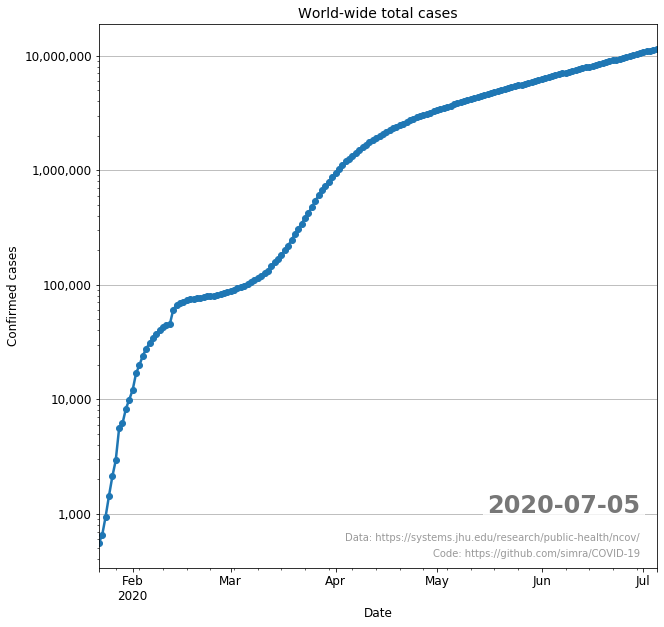

In [63]:
df=raw.groupby(lambda x: True).sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]

#df = df[(df.index.isin(['Canada','Japan'])) | (df[last_date]>4000)]
#df = df[df.index.isin(['US','France','Germany','Italy','Spain'])]
#df = df.groupby(df.index=='US').sum()
df.index = ['World']
df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)

df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
maxDate = max(df.index)
#del df['Cruise Ship']
#df=shift(df)
df
ax=plotdataframe(df, logy=True, legend=False)
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel('Date', size=12)
ax.set_title('World-wide total cases', size=14)
ax.grid(axis='y')
ax.set_ylabel('Confirmed cases', size=12)
ax.text(0.97, 0.1, maxDate.strftime('%Y-%m-%d'), transform=ax.transAxes, color='#777777', size=24, ha='right', weight=800, bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
ax.text(0.97, 0.05, 'Data: https://systems.jhu.edu/research/public-health/ncov/', transform=ax.transAxes, ha='right', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
ax.text(0.97, 0.02, 'Code: https://github.com/simra/COVID-19', transform=ax.transAxes, ha='right', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))

save_figure(maxDate,'7_world.png')

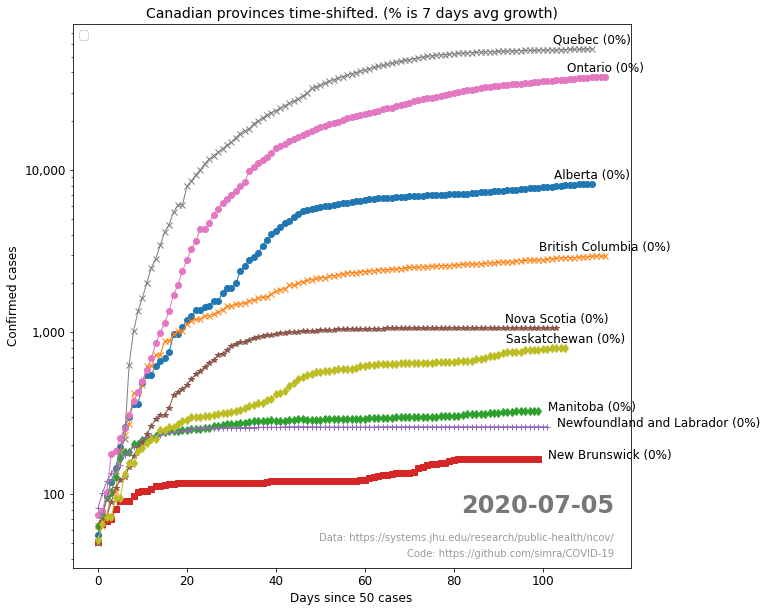

In [64]:
df = raw[raw['Country/Region']=='Canada']
df=df.groupby('Province/State').sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]
threshold=50
df = df[df[last_date]>threshold]
#df = df[df.index.isin(['US','France','Germany','Italy','Spain'])]
#df = df.groupby(df.index=='US').sum()
#df.index = ['World']

df['Province/State']=df.index
df=df.melt(id_vars='Province/State',var_name='date', value_name='Confirmed').pivot(index='date',columns='Province/State')
df['date']=pd.to_datetime(df.index)

df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
for c in ['Recovered', 'Diamond Princess', 'Grand Princess']:
    if c in df:
        del df[c] 

maxDate = max(df.index)
df=shift(df,threshold)
df
ax=plotdataframe_point(df, logy=True, legend_loc='upper left', title='Canadian provinces time-shifted. (% is 7 days avg growth)')
ax.set_xlabel('Days since {} cases'.format(threshold), size=12)
ax.set_ylabel('Confirmed cases', size=12)
ax.text(0.97, 0.1, maxDate.strftime('%Y-%m-%d'), transform=ax.transAxes, color='#777777', size=24, ha='right', weight=800)
ax.text(0.97, 0.05, 'Data: https://systems.jhu.edu/research/public-health/ncov/', transform=ax.transAxes, ha='right', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
ax.text(0.97, 0.02, 'Code: https://github.com/simra/COVID-19', transform=ax.transAxes, ha='right', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))

save_figure(maxDate, '8_canada.png')

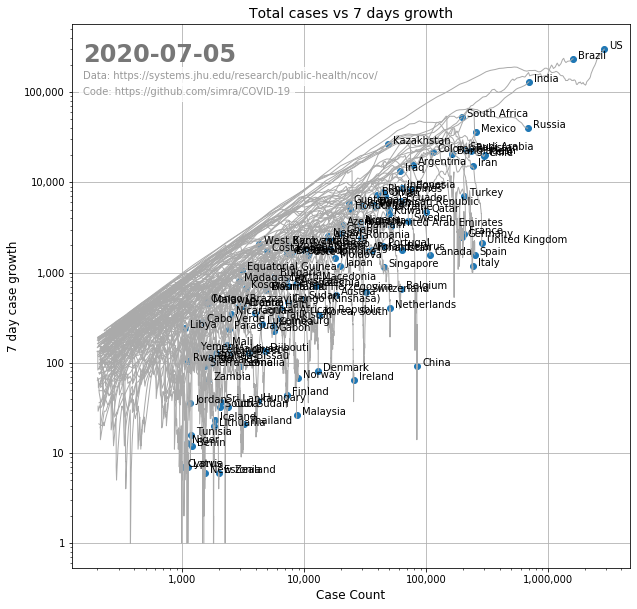

In [65]:
df=raw.groupby('Country/Region').sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]

df = df[(df.index.isin(['Canada','Japan', 'Australia'])) | (df[last_date]>1000)]

df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)

df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
#del df['Cruise Ship']
maxDate=max(df.index)

plt.rcParams["figure.figsize"] = [10, 10]
fig, ax = plt.subplots()
growth = {}
points = []
markers = [item for sublist in ['oxds+*']*ceil(len(df.columns)/5) for item in sublist]    
start = 20
for c,m in zip(df.columns,markers):
    #growth[c] = [(pow(df[c][i]/max(1.0,df[c][i-6]),1.0/7)-1)*100 if df[c][i]>200 else float('nan') for i in range(20,len(df[c]))]
    growth[c] = [df[c][i]-df[c][i-6] if (df[c][i]>200 and df[c][i]>df[c][i-6]) else float('nan') for i in range(start,len(df[c]))]
    #growth[c] = [growth[c][i] if growth[c][i]<100 else float('nan') for i in range(len(growth[c]))]
    ax.plot(df[c][start:], growth[c], linewidth=1,color='#aaaaaa')
    points.append([df[c][-1],growth[c][-1],c])

ax.scatter([p[0] for p in points],[p[1] for p in points])   
for (x,y,txt) in points:
    ax.annotate(txt,(x,y), xytext=(5,0), textcoords='offset points')
font = font_manager.FontProperties(family='sans-serif',
                                   weight='normal',
                                   style='normal', size=12)


ax.grid()
ax.set_xscale('log')
ax.set_yscale('log')
ax.get_xaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#ax.yaxis.set_label_position("right")
#ax.set_ylim([0,50])
ax.set_xlabel('Case Count', size=12)
ax.set_ylabel('7 day case growth', size=12)
ax.set_title('Total cases vs 7 days growth', size=14)
#ax.legend(df.columns, prop=font)    
#plt.ylim((0,100))
ax.text(0.02, 0.93, maxDate.strftime('%Y-%m-%d'), transform=ax.transAxes, color='#777777', size=24, ha='left', weight=800)
ax.text(0.02, 0.90, 'Data: https://systems.jhu.edu/research/public-health/ncov/', transform=ax.transAxes, ha='left', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
ax.text(0.02, 0.87, 'Code: https://github.com/simra/COVID-19', transform=ax.transAxes, ha='left', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
save_figure(maxDate,'10_countvsgrowth.png')

[[2.30103    1.        ]
 [5.97623852 1.        ]] [3.71999835e+01 2.26799420e+05]


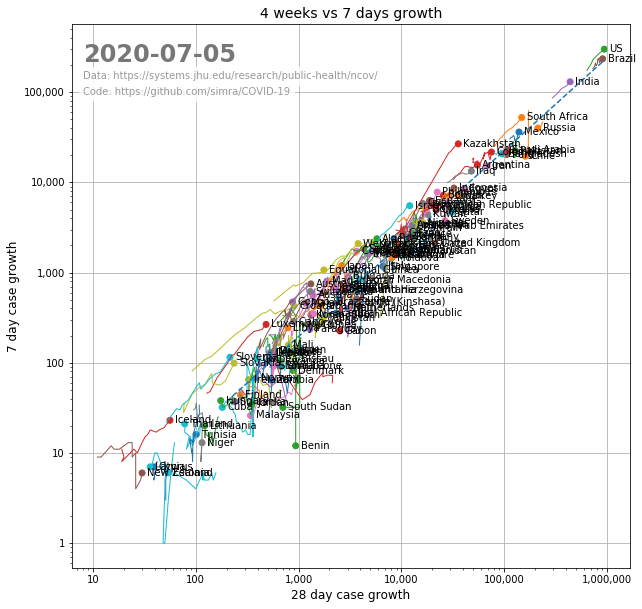

In [66]:
df=raw.groupby('Country/Region').sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]

df = df[(df.index.isin(['Canada','Japan', 'Australia'])) | (df[last_date]>1000)]

df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)

df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
#del df['Cruise Ship']
maxDate=max(df.index)

plt.rcParams["figure.figsize"] = [10, 10]
fig, ax = plt.subplots()
growth = {}
growth_l = {}
points = []
markers = [item for sublist in ['oxds+*']*ceil(len(df.columns)/5) for item in sublist]    
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colorsToUse=colors*ceil(len(df.columns)/len(colors))
long_window= 4*7
start = long_window
for c,m,col in zip(df.columns,markers,colorsToUse):
    #growth[c] = [(pow(df[c][i]/max(1.0,df[c][i-6]),1.0/7)-1)*100 if df[c][i]>200 else float('nan') for i in range(20,len(df[c]))]
    growth[c] = [df[c][i]-df[c][i-6] if (df[c][i]>200 and df[c][i]>df[c][i-6]) else float('nan') for i in range(start,len(df[c]))]
    growth_l[c] = [df[c][i]-df[c][i-long_window] if (df[c][i]>200 and df[c][i]>df[c][i-long_window]) else float('nan') for i in range(start,len(df[c]))]
    #growth[c] = [growth[c][i] if growth[c][i]<100 else float('nan') for i in range(len(growth[c]))]
    ax.plot(growth_l[c][-14:], growth[c][-14:], linewidth=1,color=col)
    points.append([growth_l[c][-1],growth[c][-1],c])

ax.scatter([p[0] for p in points],[p[1] for p in points],color=colorsToUse[:len(points)])   
for (x,y,txt) in points:
    ax.annotate(txt,(x,y), xytext=(5,0), va='center', textcoords='offset points')
font = font_manager.FontProperties(family='sans-serif',
                                   weight='normal',
                                   style='normal', size=12)



from math import log10 as log
x = [log(growth_l[c][-1]) if growth_l[c][-1]>0 else 0 for c in growth]
y = [log(growth[c][-1]) if growth[c][-1]>0 else 0 for c in growth]
model = np.polyfit(x,y,1)
model
model_x = np.array([[log(200),1],[max(x),1]])
model_y = np.power(10,model_x.dot(model))
print(model_x,model_y)
ax.plot(np.power(10,model_x[:,0]), model_y, linestyle='--')

ax.grid()
ax.set_xscale('log')
ax.set_yscale('log')
ax.get_xaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#ax.yaxis.set_label_position("right")
#ax.set_ylim([0,50])
ax.set_xlabel('28 day case growth', size=12)
ax.set_ylabel('7 day case growth', size=12)
ax.set_title('4 weeks vs 7 days growth', size=14)
#ax.legend(df.columns, prop=font)    
#plt.ylim((0,100))
ax.text(0.02, 0.93, maxDate.strftime('%Y-%m-%d'), transform=ax.transAxes, color='#777777', size=24, ha='left', weight=800)
ax.text(0.02, 0.90, 'Data: https://systems.jhu.edu/research/public-health/ncov/', transform=ax.transAxes, ha='left', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
ax.text(0.02, 0.87, 'Code: https://github.com/simra/COVID-19', transform=ax.transAxes, ha='left', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
save_figure(maxDate,'10_b_countvsgrowth_8week.png')

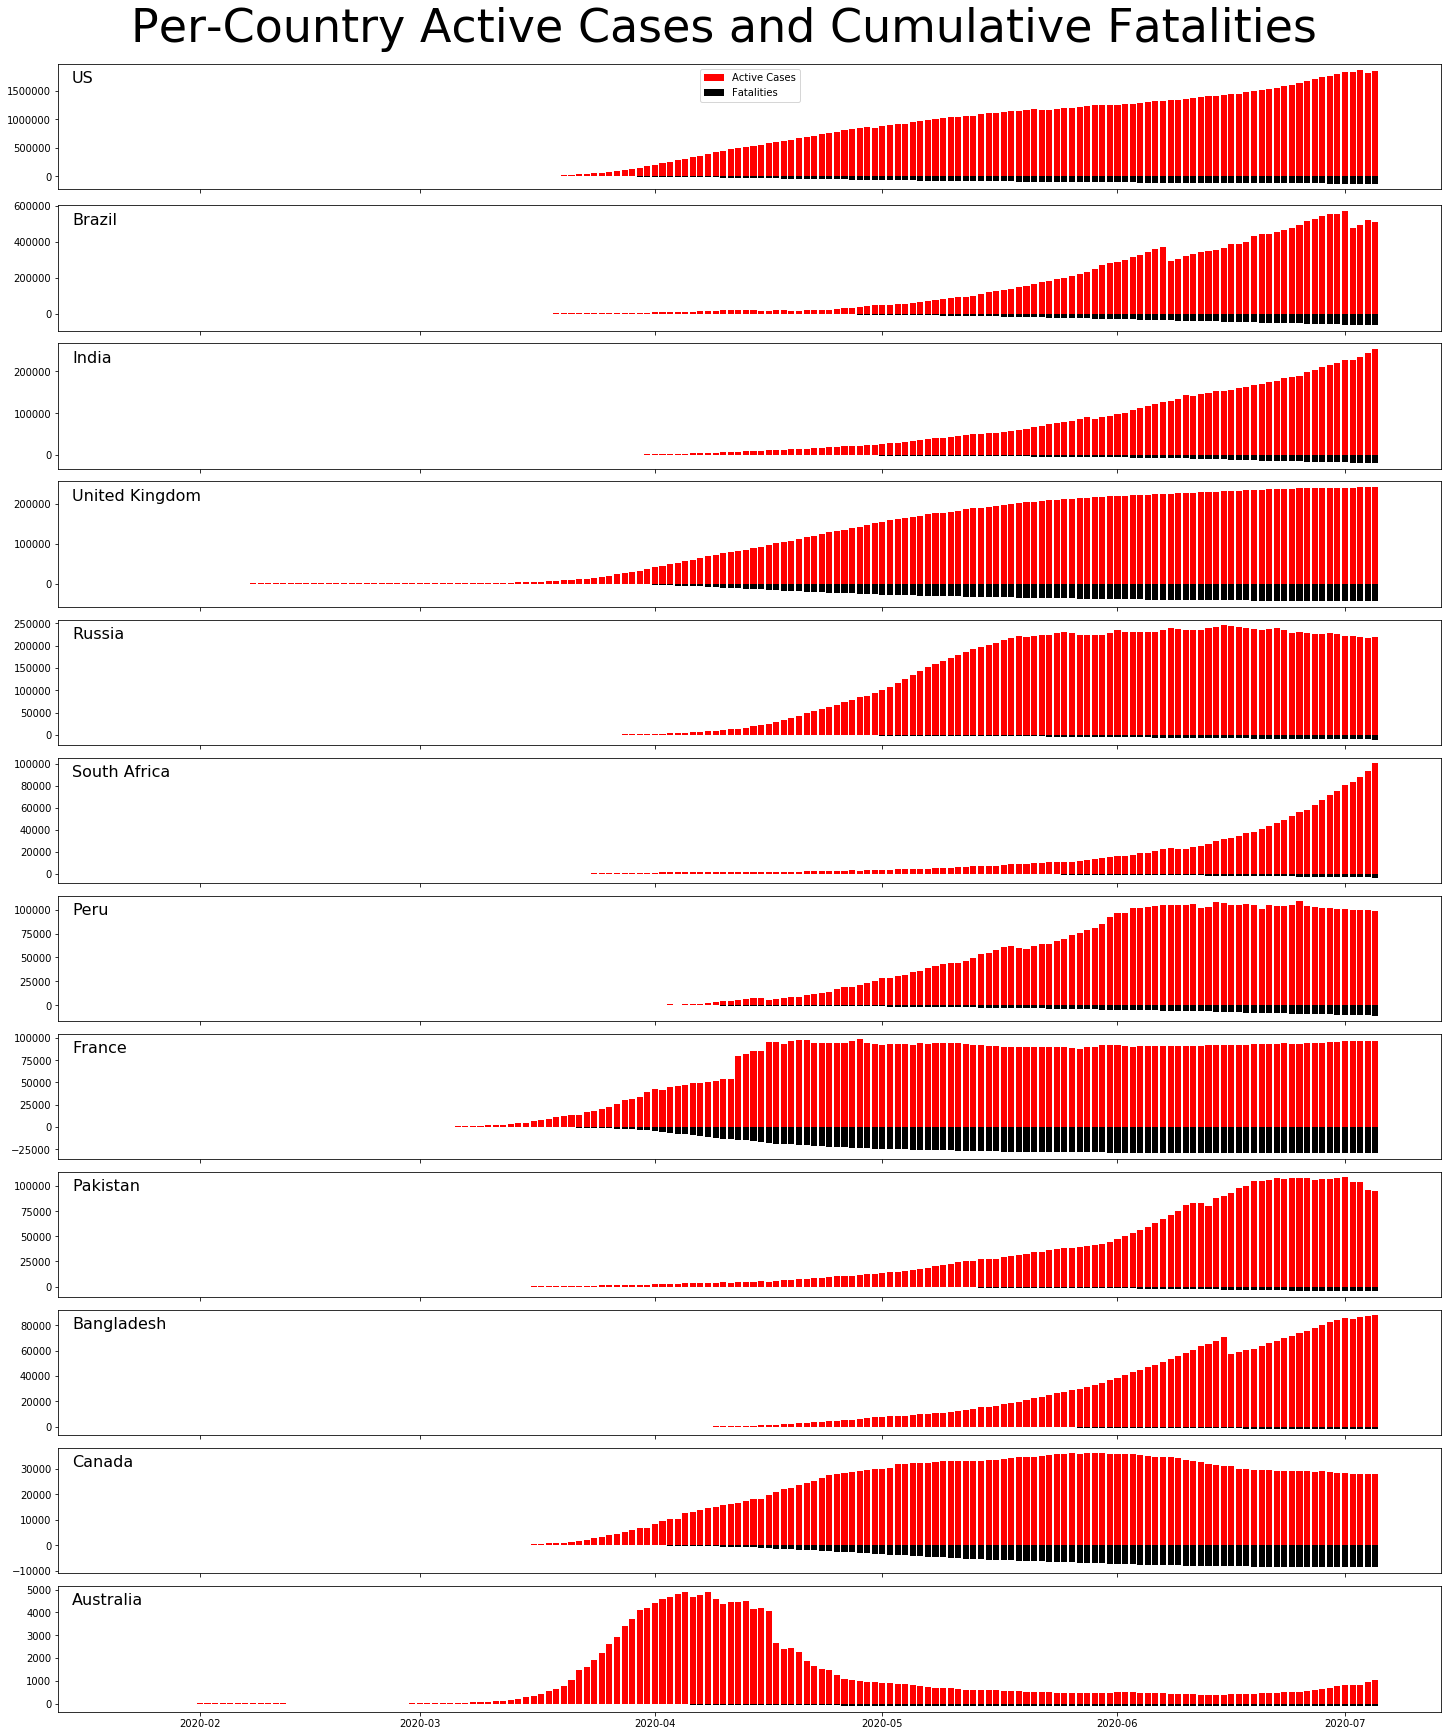

In [67]:


def prepData(datapath):
    raw = pd.read_csv(datapath)
    del raw['Lat']
    del raw['Long']
    raw= raw.replace('Mainland China','China')
    df=raw.groupby('Country/Region').sum()
    # 03/14: temporarily drop the last column
    #del df[df.columns[-1]]
    last_date = list(df.columns)[-1]

    #df = df[(df.index.isin(['Canada','Japan'])) | (df[last_date]>100)]

    df['Country/Region']=df.index
    df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
    df['date']=pd.to_datetime(df.index)

    df.index.name = None
    df=df.sort_values(by=['date'])
    df.set_index('date', inplace=True)
    df.columns = [c[1] for c in df.columns]
    return df

deaths = prepData('../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered = prepData('../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
confirmed = prepData('../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')


def plotBars(countries):
    plt.rcParams["figure.figsize"] = [20, 2*len(countries)]
    fig, axs = plt.subplots(len(countries),1, sharex=True,constrained_layout=True)
    fig.suptitle('Per-Country Active Cases and Cumulative Fatalities',size=46)
    for (i,(country,ax)) in enumerate(zip(countries,axs)):
        active = []
        for (c,r,d) in zip(confirmed[country], recovered[country], deaths[country]):
            active.append(c-r-d) 
        #if country=='Canada':
        #print(active,confirmed[country])
        ax.bar(confirmed.index,active, color='red')
        rec = []
        for (r,d) in zip(recovered[country],deaths[country]):
            rec.append(r+d)        
        #ax.bar(recovered.index,rec, color='green')
        ax.bar(deaths.index, deaths[country]*(-1), color='black')
        #ax.set_yscale('log')
        ax.text(0.01,0.85,country, transform=ax.transAxes, ha='left', size=16) 
        
        if i==0:
            ax.legend(['Active Cases','Fatalities'], loc='upper center')

countries = sorted(confirmed.columns, key=lambda x: confirmed[x][-1]-recovered[x][-1]-deaths[x][-1], reverse=True)[:10]
for c in ['Canada','Australia']:
    if c not in countries:
        countries+=[c]
#plotBars(['China','Canada','US','Italy','Singapore','Korea, South','Japan','Germany','France','Australia','United Kingdom','Spain'])
plotBars(countries)

maxDate = confirmed.index[-1]
#print(maxDate)
save_figure(maxDate,'5_barplots.png')

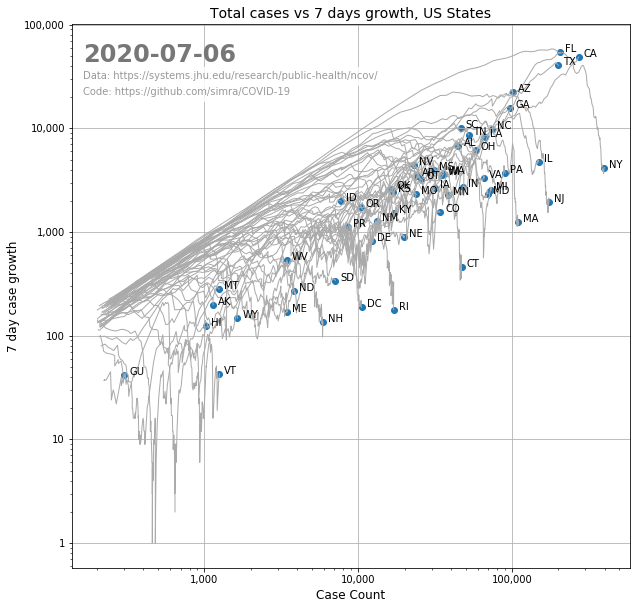

In [68]:
covidtracking = pd.read_csv('../other3p/covidtracking_daily.csv')
covidtracking['date'] = pd.to_datetime(covidtracking['date'],format="%Y%m%d")
maxDate = max(covidtracking['date'])
df = covidtracking.pivot(index='date',columns='state', values='positive')
#df = df[[c for c in df.columns if df[c].max()>1000]]

maxDate=max(df.index)
plt.rcParams["figure.figsize"] = [10, 10]
fig, ax = plt.subplots()
growth = {}
points = []

markers = [item for sublist in ['oxds+*']*ceil(len(df.columns)/5) for item in sublist]    
growth = {}
start = 7
#print(list(zip(df.columns,markers))[42])
#print(df['PR'])
for c,m in list(zip(df.columns,markers)):
    #growth[c] = [(pow(df[c][i]/max(1.0,df[c][i-6]),1.0/7)-1)*100 if df[c][i]>200 else float('nan') for i in range(20,len(df[c]))]
    growth[c] = [df[c][i]-df[c][i-6] if (df[c][i]>200 and df[c][i]>df[c][i-6]) else float('nan') for i in range(start,len(df[c]))]
    #growth[c] = [growth[c][i] if growth[c][i]<100 else float('nan') for i in range(len(growth[c]))]
    #print(max(df[c]),max(growth[c]))
    ax.plot(df[c][start:], growth[c], linewidth=1,color='#aaaaaa')
    points.append([df[c][-1],growth[c][-1],c])
    

ax.scatter([p[0] for p in points],[p[1] for p in points])   
for (x,y,txt) in points:
    ax.annotate(txt,(x,y), xytext=(5,0), textcoords='offset points')
font = font_manager.FontProperties(family='sans-serif',
                                   weight='normal',
                                   style='normal', size=12)


ax.grid() 
ax.set_xscale('log')
ax.set_yscale('log')
ax.get_xaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#ax.yaxis.set_label_position("right")
#ax.set_ylim([0,50])
ax.set_xlabel('Case Count', size=12)
ax.set_ylabel('7 day case growth', size=12)
ax.set_title('Total cases vs 7 days growth, US States', size=14)
#ax.legend(df.columns, prop=font)    
#plt.ylim((0,100))
ax.text(0.02, 0.93, maxDate.strftime('%Y-%m-%d'), transform=ax.transAxes, color='#777777', size=24, ha='left', weight=800)
ax.text(0.02, 0.90, 'Data: https://systems.jhu.edu/research/public-health/ncov/', transform=ax.transAxes, ha='left', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
ax.text(0.02, 0.87, 'Code: https://github.com/simra/COVID-19', transform=ax.transAxes, ha='left', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))


save_figure(maxDate,'11_usstatesgrowth.png')

[[2.30103    1.        ]
 [5.47712125 1.        ]] [   81.77640957 75391.36490885]


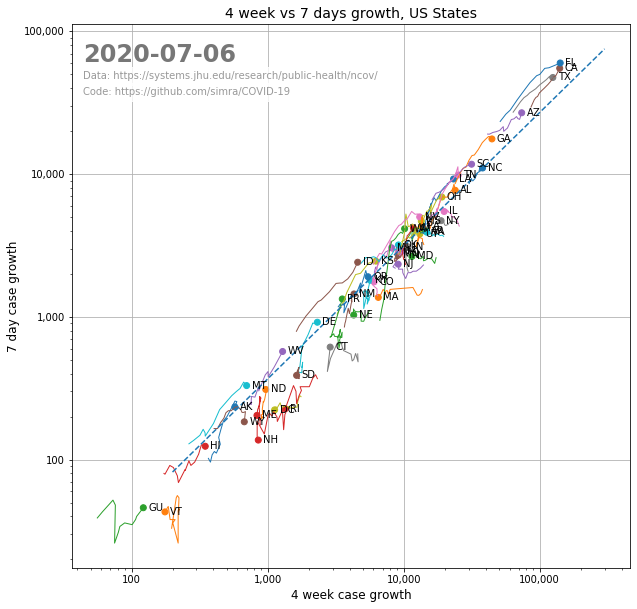

In [69]:
covidtracking = pd.read_csv('../other3p/covidtracking_daily.csv')
covidtracking['date'] = pd.to_datetime(covidtracking['date'],format="%Y%m%d")
maxDate = max(covidtracking['date'])
df = covidtracking.pivot(index='date',columns='state', values='positive')
#df = df[[c for c in df.columns if df[c].max()>1000]]

maxDate=max(df.index)
plt.rcParams["figure.figsize"] = [10, 10]
fig, ax = plt.subplots()
growth = {}
points = []

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
markers = [item for sublist in ['oxds+*']*ceil(len(df.columns)/5) for item in sublist]    
growth = {}
growth_l = {}
window_long = 4*7
start = window_long
colorsToUse=colors*ceil(len(df.columns)/len(colors))
#print(colorsToUse)                        
for c,m,col in zip(df.columns,markers,colorsToUse):
    #growth[c] = [(pow(df[c][i]/max(1.0,df[c][i-6]),1.0/7)-1)*100 if df[c][i]>200 else float('nan') for i in range(20,len(df[c]))]
    growth[c] = [df[c][i]-df[c][i-7] if (df[c][i]>200 and df[c][i]>df[c][i-7]) else float('nan') for i in range(start,len(df[c]))]
    growth_l[c] = [df[c][i]-df[c][i-window_long] if (df[c][i]>200 and df[c][i]>df[c][i-window_long])  else float('nan') for i in range(start,len(df[c]))]    
    #growth[c] = [growth[c][i] if growth[c][i]<100 else float('nan') for i in range(len(growth[c]))]
    #print(growth_l[c],growth[c])
    ax.plot(growth_l[c][-14:], growth[c][-14:], linewidth=1,color=col)
    points.append([growth_l[c][-1],growth[c][-1],c])

ax.scatter([p[0] for p in points],[p[1] for p in points],color=colorsToUse[:len(points)])   
for (x,y,txt) in points:
    ax.annotate(txt,(x,y), xytext=(5,0), va='center', textcoords='offset points')
font = font_manager.FontProperties(family='sans-serif',
                                   weight='normal',
                                   style='normal', size=12)


ax.grid() 
ax.set_xscale('log')
ax.set_yscale('log')
ax.get_xaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#ax.yaxis.set_label_position("right")
#ax.set_ylim([0,50])
ax.set_xlabel('4 week case growth', size=12)
ax.set_ylabel('7 day case growth', size=12)
ax.set_title('4 week vs 7 days growth, US States', size=14)
#ax.legend(df.columns, prop=font)    
#plt.ylim((0,100))
ax.text(0.02, 0.93, maxDate.strftime('%Y-%m-%d'), transform=ax.transAxes, color='#777777', size=24, ha='left', weight=800)
ax.text(0.02, 0.90, 'Data: https://systems.jhu.edu/research/public-health/ncov/', transform=ax.transAxes, ha='left', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
ax.text(0.02, 0.87, 'Code: https://github.com/simra/COVID-19', transform=ax.transAxes, ha='left', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))

from math import log10 as log
x = [log(growth_l[c][-1]) if growth_l[c][-1]>0 else 0 for c in growth]
y = [log(growth[c][-1]) if growth[c][-1]>0 else 0 for c in growth]
model = np.polyfit(x,y,1)
model
model_x = np.array([[log(200),1],[log(300000),1]])
model_y = np.power(10,model_x.dot(model))
print(model_x,model_y)
ax.plot(np.power(10,model_x[:,0]), model_y, linestyle='--')

save_figure(maxDate,'11_b_usstatesgrowth.png')

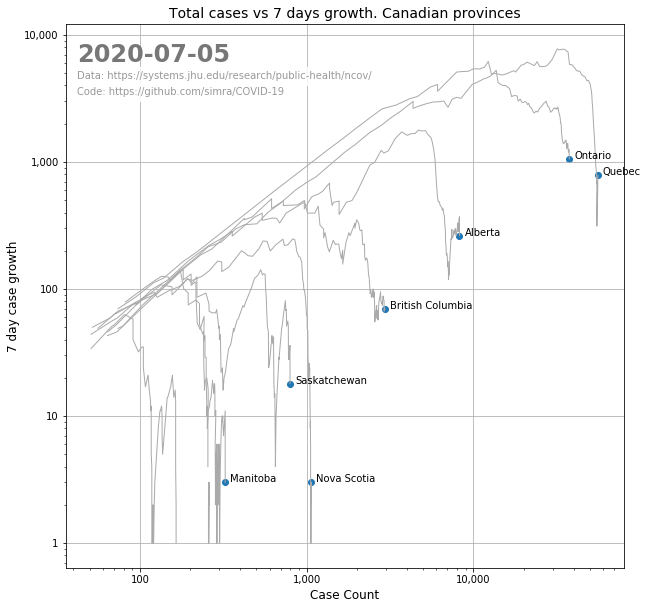

In [70]:
df = raw[raw['Country/Region']=='Canada']
df=df.groupby('Province/State').sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]
threshold=50
df = df[df[last_date]>threshold]
#df = df[df.index.isin(['US','France','Germany','Italy','Spain'])]
#df = df.groupby(df.index=='US').sum()
#df.index = ['World']

df['Province/State']=df.index
df=df.melt(id_vars='Province/State',var_name='date', value_name='Confirmed').pivot(index='date',columns='Province/State')
df['date']=pd.to_datetime(df.index)

df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
for c in ['Recovered', 'Diamond Princess', 'Grand Princess']:
    if c in df:
        del df[c] 

maxDate = max(df.index)

plt.rcParams["figure.figsize"] = [10, 10]
fig, ax = plt.subplots()
growth = {}
points = []

markers = [item for sublist in ['oxds+*']*ceil(len(df.columns)/5) for item in sublist]    
growth = {}
start = 7
for c,m in zip(df.columns,markers):
    #growth[c] = [(pow(df[c][i]/max(1.0,df[c][i-6]),1.0/7)-1)*100 if df[c][i]>200 else float('nan') for i in range(20,len(df[c]))]
    growth[c] = [df[c][i]-df[c][i-7] if (df[c][i]>threshold and df[c][i]>df[c][i-7]) else float('nan') for i in range(start,len(df[c]))]
    #growth[c] = [growth[c][i] if growth[c][i]<100 else float('nan') for i in range(len(growth[c]))]
    ax.plot(df[c][start:], growth[c], linewidth=1,color='#aaaaaa')
    points.append([df[c][-1],growth[c][-1],c])

ax.scatter([p[0] for p in points],[p[1] for p in points])   
for (x,y,txt) in points:
    ax.annotate(txt,(x,y), xytext=(5,0), textcoords='offset points')
font = font_manager.FontProperties(family='sans-serif',
                                   weight='normal',
                                   style='normal', size=12)


ax.grid() 
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Total cases vs 7 days growth. Canadian provinces', size=14)
ax.get_xaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#ax.yaxis.set_label_position("right")
#ax.set_ylim([0,50])
ax.set_xlabel('Case Count', size=12)
ax.set_ylabel('7 day case growth', size=12)
#ax.legend(df.columns, prop=font)    
#plt.ylim((0,100))
ax.text(0.02, 0.93, maxDate.strftime('%Y-%m-%d'), transform=ax.transAxes, color='#777777', size=24, ha='left', weight=800)
ax.text(0.02, 0.90, 'Data: https://systems.jhu.edu/research/public-health/ncov/', transform=ax.transAxes, ha='left', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
ax.text(0.02, 0.87, 'Code: https://github.com/simra/COVID-19', transform=ax.transAxes, ha='left', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))


save_figure(maxDate,'12_canadagrowth.png')


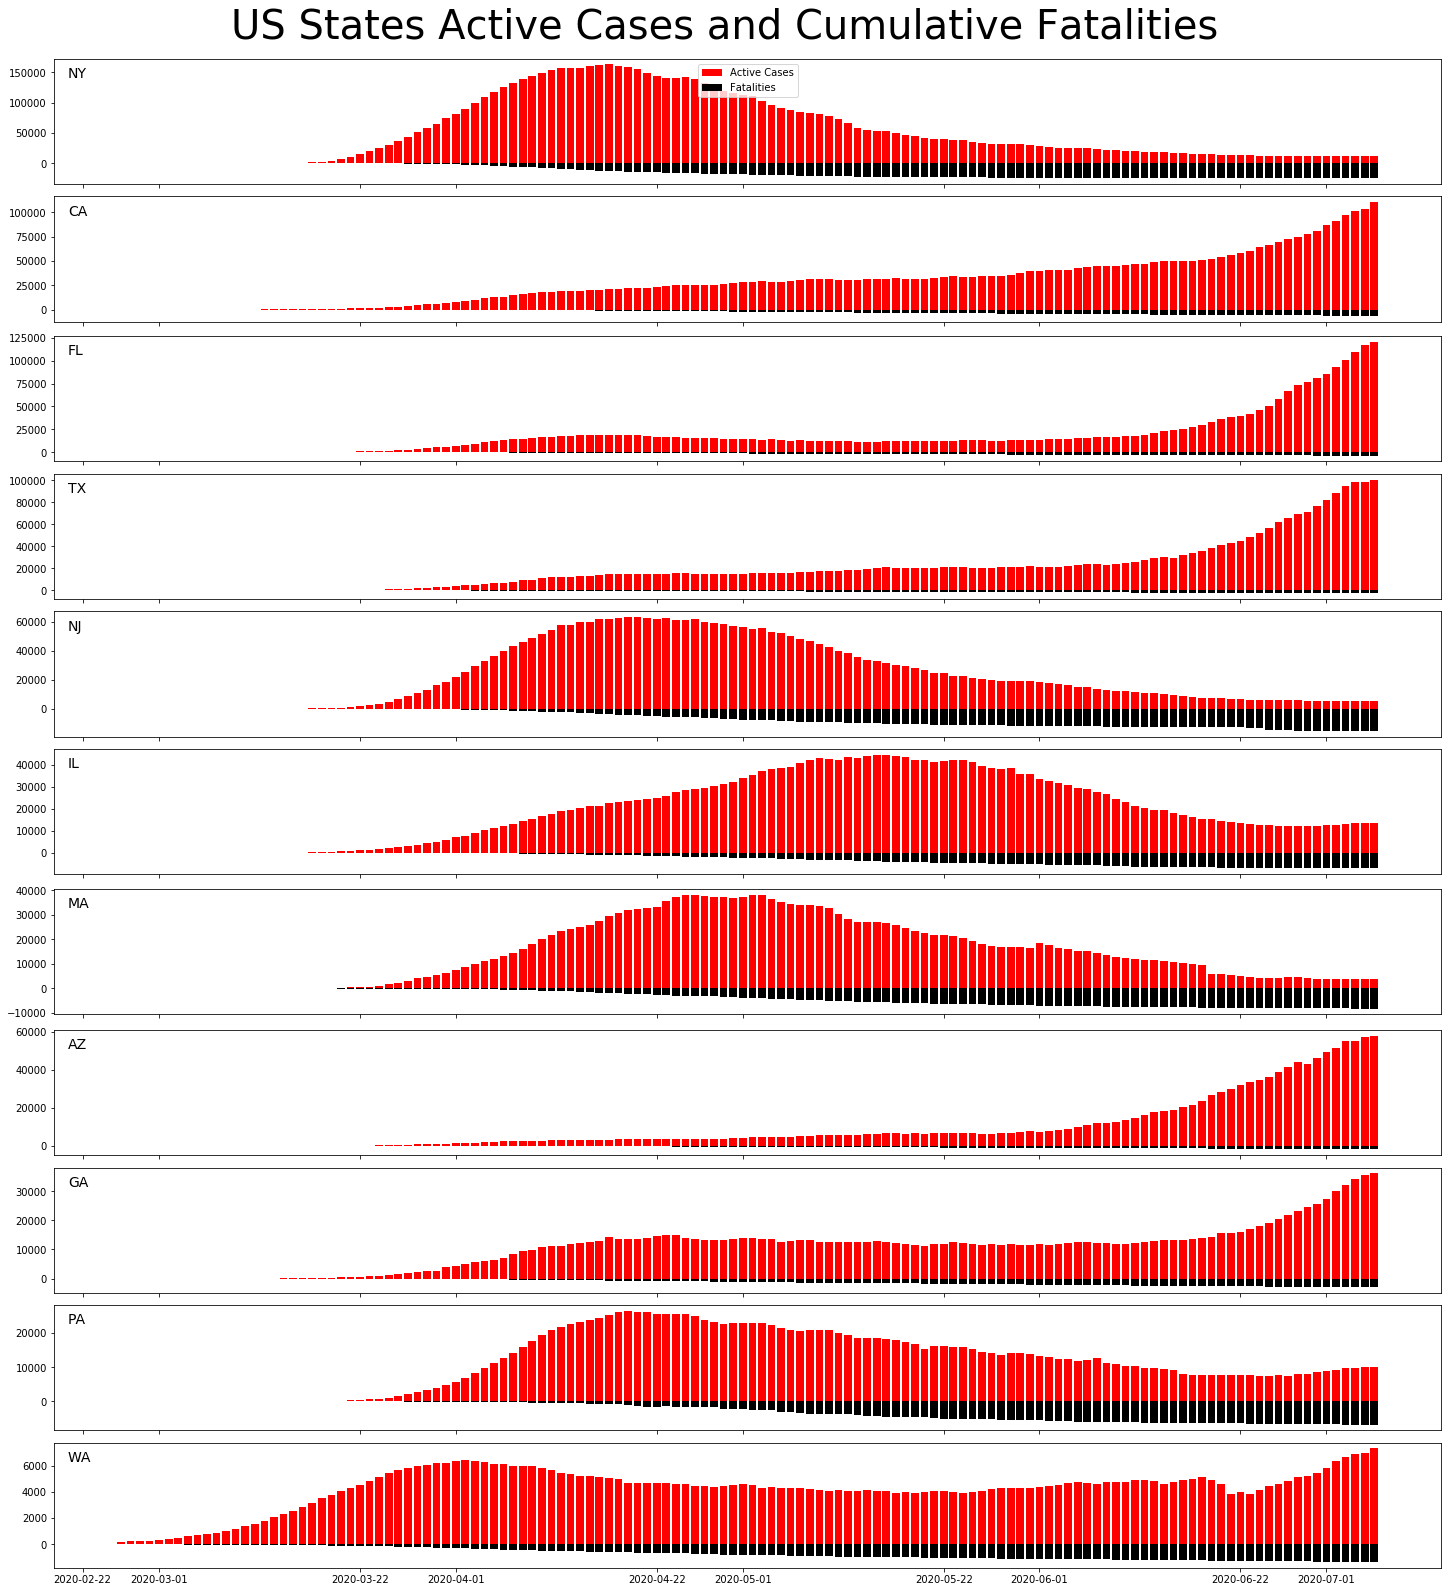

In [71]:
covidtracking = pd.read_csv('../other3p/covidtracking_daily.csv')
covidtracking['date'] = pd.to_datetime(covidtracking['date'],format="%Y%m%d")
maxDate = max(covidtracking['date'])
confirmed = covidtracking.pivot(index='date',columns='state', values='positive')
deaths = covidtracking.pivot(index='date',columns='state', values='death')
offset = 18

#df = df[[c for c in df.columns if df[c].max()>1000]]

maxDate=max(df.index)


def plotBars(countries):
    plt.rcParams["figure.figsize"] = [20, 2*len(countries)]
    fig, axs = plt.subplots(len(countries),1, sharex=True,constrained_layout=True)
    for (i,(country,ax)) in enumerate(zip(countries,axs)):
        recovered = [0 if j-offset<0 else max(0,confirmed[country][j-offset]-deaths[country][j]) for j in range(0,len(confirmed[country]))]
        active = []
        for (c,r,d) in zip(confirmed[country], recovered, deaths[country]):
            active.append(c-r-d)
        ax.bar(confirmed.index,active, color='red')
        #ax.bar(confirmed.index,recovered, color='red')
        rec = []
        #for (r,d) in zip(recovered,deaths[country]):
        #    rec.append(r+d)
        #ax.bar(recovered.index,rec, color='green')
        ax.bar(deaths.index, deaths[country]*(-1), color='black')
        #ax.set_yscale('log')
        ax.text(0.01,0.85,country, transform=ax.transAxes, ha='left', size=14)
        fig.suptitle('US States Active Cases and Cumulative Fatalities',size=40)
        if i==0:
            ax.legend(['Active Cases','Fatalities'], loc='upper center')

statesToPlot = list(sorted(confirmed.columns, key=lambda c: max(confirmed[c].fillna(0)), reverse=True)[:10])
if 'WA' not in statesToPlot:
    statesToPlot += ['WA']
#plotBars(['WA','NY','CA','NJ','MA','LA','FL'])
plotBars(statesToPlot)

maxDate = confirmed.index[-1]
#print(maxDate)
save_figure(maxDate,'16_usbarplots.png')

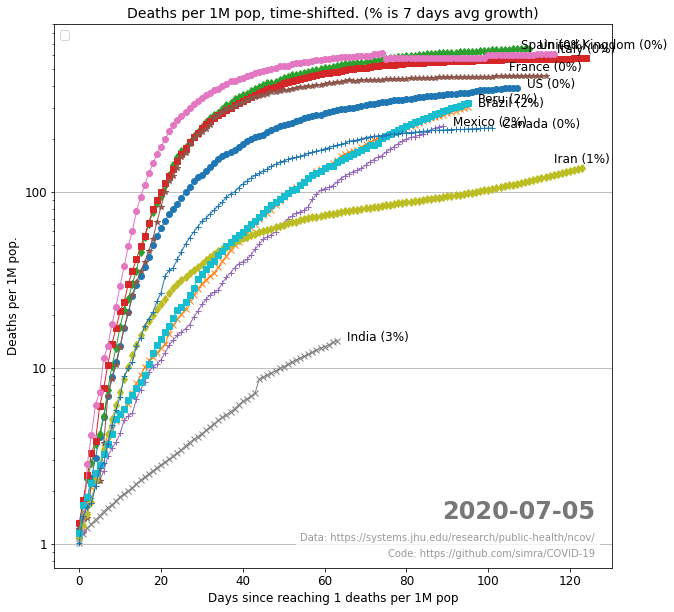

In [72]:
# Try normalizing by population
# https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv
wpp = pd.read_csv('../wpp/WPP2019_TotalPopulationBySex.csv')
wpp=wpp[(wpp['Time']==2020) & (wpp['Variant']=='Medium')]
wpp = dict(zip(wpp['Location'],wpp['PopTotal']))
wpp['Iran']=wpp['Iran (Islamic Republic of)']
wpp['US']=wpp['United States of America']
wpp['Korea, South']= wpp['Republic of Korea']
wpp['Russia'] = wpp['Russian Federation']
wpp['Bolivia'] = wpp['Bolivia (Plurinational State of)']

df=raw_deaths.groupby('Country/Region').sum()
last_date = list(df.columns)[-1]

df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)

df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
    #del df['Cruise Ship']

    
columns = list(sorted(df.columns, key=lambda x: df[x][-1], reverse=True))[:10]
for c in ['Canada','US']:
    if c not in columns:
        columns.append(c)
    
df = df[columns] #, 'Australia', 'Czechia'
for c in df.columns:
    df[c] = df[c]*1000/wpp[c]
#df = df[[c for c in df.columns if df[c].max()>10 or c in ['Canada','US']]] #, 'Australia', 'Czechia'

#plotdataframe(df, logy=True)
maxDate = max(df.index)
threshold = 1
df= shift(df,threshold=threshold)

ax=plotdataframe_point(df, logy=True, legend_loc='upper left', title='Deaths per 1M pop, time-shifted. (% is 7 days avg growth)')
ax.set_xlabel("Days since reaching {} deaths per 1M pop".format(threshold), size=12)
ax.set_ylabel("Deaths per 1M pop." , size=12)
ax.grid(axis='y')
ax.text(0.97, 0.09, maxDate.strftime('%Y-%m-%d'), transform=ax.transAxes, color='#777777', size=24, ha='right', weight=800)
ax.text(0.97, 0.05, 'Data: https://systems.jhu.edu/research/public-health/ncov/', transform=ax.transAxes, ha='right', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
ax.text(0.97, 0.02, 'Code: https://github.com/simra/COVID-19', transform=ax.transAxes, ha='right', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
save_figure(maxDate,'14_countryshift_norm-deaths.png')

#wpp

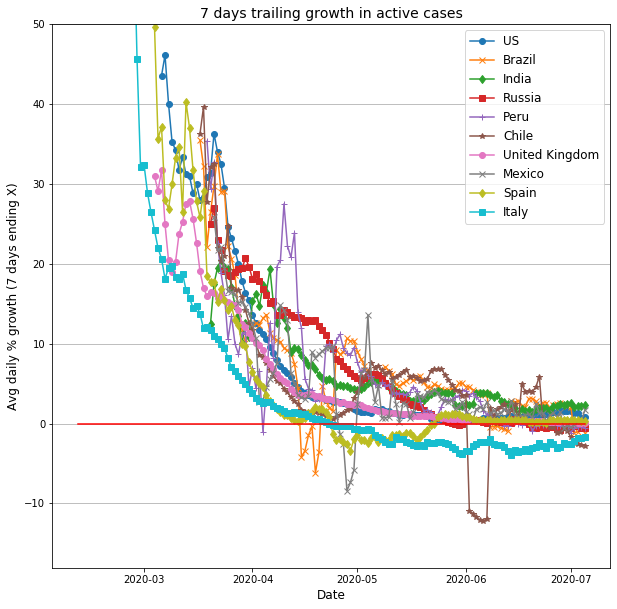

In [73]:
deaths = prepData('../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered = prepData('../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
confirmed = prepData('../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

columnsToSelect = sorted(confirmed.columns, key=lambda c: max(confirmed[c]), reverse=True)[:10]
#confirmed = confirmed[[c for c in confirmed.columns if max(confirmed[c])>10000]]
confirmed = confirmed[columnsToSelect]


def active(c):
    start = offset
    active = []
    for i in range(0,len(confirmed[c])):
        val = confirmed[c][i]-recovered[c][i]-deaths[c][i]
        if val<0: 
            print(c,confirmed[c][i], recovered[c][i], deaths[c][i])
        active.append(confirmed[c][i]-recovered[c][i]-deaths[c][i])        
    return active#del df['Cruise Ship']

maxDate=max(confirmed.index)

plt.rcParams["figure.figsize"] = [10, 10]
fig, ax = plt.subplots()
growth = {}
markers = [item for sublist in ['oxds+*']*ceil(len(confirmed.columns)/5) for item in sublist]    
for c,m in zip(confirmed.columns,markers):  
    active_cases = active(c)
    growth[c] = [(pow(active_cases[i]/max(1.0,active_cases[i-6]),1.0/7)-1)*100 if active_cases[i]>200 else float('nan') for i in range(20,len(confirmed[c]))]
    #growth[c] = [growth[c][i] if growth[c][i]<100 else float('nan') for i in range(len(growth[c]))]
    ax.plot(confirmed.index[20:], growth[c], marker=m)

ax.plot(confirmed.index[20:], [0]*len(confirmed.index[20:]),color='#ff0000')
    
font = font_manager.FontProperties(family='sans-serif',
                                   weight='normal',
                                   style='normal', size=12)

ax.set_title('7 days trailing growth in active cases', size=14)
ax.grid(axis='y') 
#ax.yaxis.set_label_position("right")
lims=ax.get_ylim()
ax.set_ylim([lims[0],50])
ax.set_xlabel('Date', size=12)
ax.set_ylabel('Avg daily % growth (7 days ending X)', size=12)
ax.legend(confirmed.columns, prop=font)    
#plt.ylim((0,100))
save_figure(maxDate,'14_growthvsactive.png')

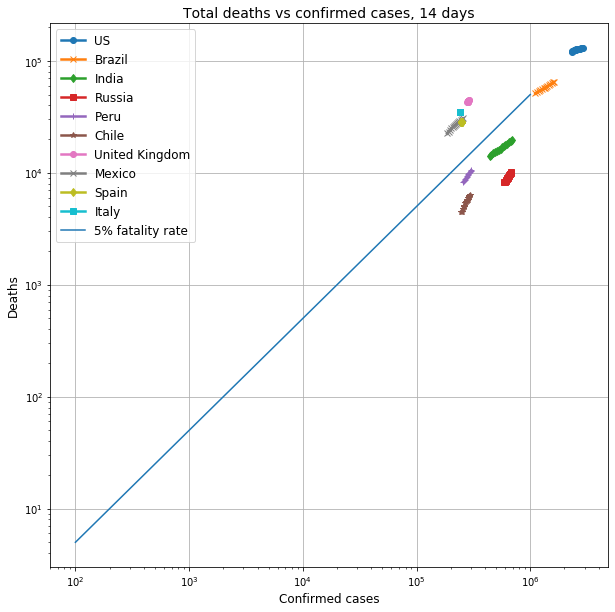

In [74]:
deaths = prepData('../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered = prepData('../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
confirmed = prepData('../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

columnsToSelect = sorted(confirmed.columns, key=lambda c: max(confirmed[c]), reverse=True)[:10]
#confirmed = confirmed[[c for c in confirmed.columns if max(confirmed[c])>10000]]
confirmed = confirmed[columnsToSelect]
deaths = deaths[[c for c in confirmed.columns]]

maxDate=max(confirmed.index)

plt.rcParams["figure.figsize"] = [10, 10]
fig, ax = plt.subplots()
growth = {}
markers = [item for sublist in ['oxds+*']*ceil(len(confirmed.columns)/5) for item in sublist]    
for c,m in zip(confirmed.columns,markers):  
    ax.plot(confirmed[c][-14:],deaths[c][-14:], marker=m, linewidth=2.5)

ax.plot([100,1e6],[5,5e4])
    
font = font_manager.FontProperties(family='sans-serif',
                                   weight='normal',
                                   style='normal', size=12)


ax.grid() 
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Confirmed cases', size=12)
ax.set_ylabel('Deaths', size=12)
ax.set_title('Total deaths vs confirmed cases, 14 days', size=14)
ax.legend(list(confirmed.columns)+['5% fatality rate'], prop=font)    
save_figure(maxDate,'15_deathsvsconfirmed.png')

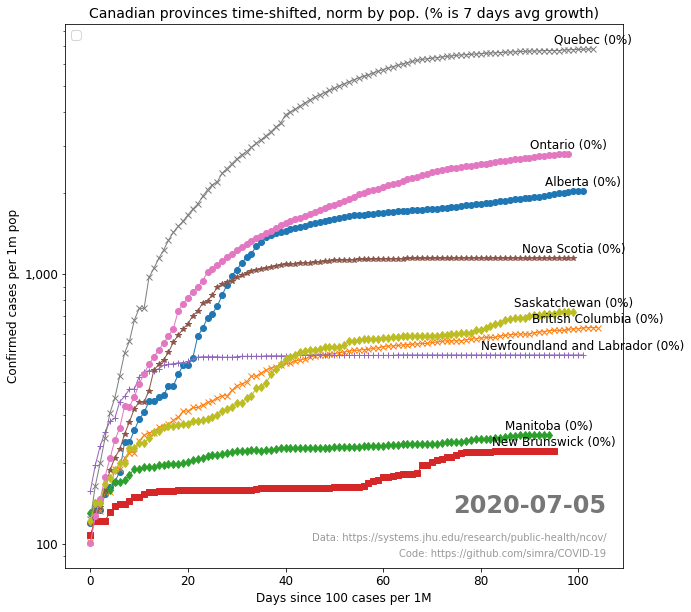

In [75]:
# 2016 census
canadapop = {
 'Ontario': 13448494,
 'Quebec': 8164361,
 'British Columbia': 4648055,
 'Alberta': 4067175,
 'Manitoba': 1278365,
 'Saskatchewan': 1098352,
 'Nova Scotia': 923598,
 'New Brunswick': 747101,
 'Newfoundland and Labrador': 519716,
 'Prince Edward Island': 142907,
 'Northwest Territories': 41786,
 'Nunavut': 35944,
 'Yukon': 35874

}

df = raw[raw['Country/Region']=='Canada']
df=df.groupby('Province/State').sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]
threshold=50
df = df[df[last_date]>threshold]
#df = df[df.index.isin(['US','France','Germany','Italy','Spain'])]
#df = df.groupby(df.index=='US').sum()
#df.index = ['World']

df['Province/State']=df.index
df=df.melt(id_vars='Province/State',var_name='date', value_name='Confirmed').pivot(index='date',columns='Province/State')
df['date']=pd.to_datetime(df.index)

df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
for c in ['Recovered', 'Diamond Princess', 'Grand Princess']:
    if c in df:
        del df[c] 

for c in df.columns:
    df[c] = df[c]*1e6/canadapop[c]
        
threshold = 100
maxDate = max(df.index)
df=shift(df,threshold)
df
# TODO: change to log plot if these grow > 1
ax=plotdataframe_point(df, logy=True, legend_loc='upper left', title='Canadian provinces time-shifted, norm by pop. (% is 7 days avg growth)')
ax.set_xlabel('Days since {} cases per 1M'.format(threshold), size=12)
ax.set_ylabel('Confirmed cases per 1m pop', size=12)
ax.text(0.97, 0.1, maxDate.strftime('%Y-%m-%d'), transform=ax.transAxes, color='#777777', size=24, ha='right', weight=800)
ax.text(0.97, 0.05, 'Data: https://systems.jhu.edu/research/public-health/ncov/', transform=ax.transAxes, ha='right', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
ax.text(0.97, 0.02, 'Code: https://github.com/simra/COVID-19', transform=ax.transAxes, ha='right', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))

save_figure(maxDate, '16_canada_normalized.png')

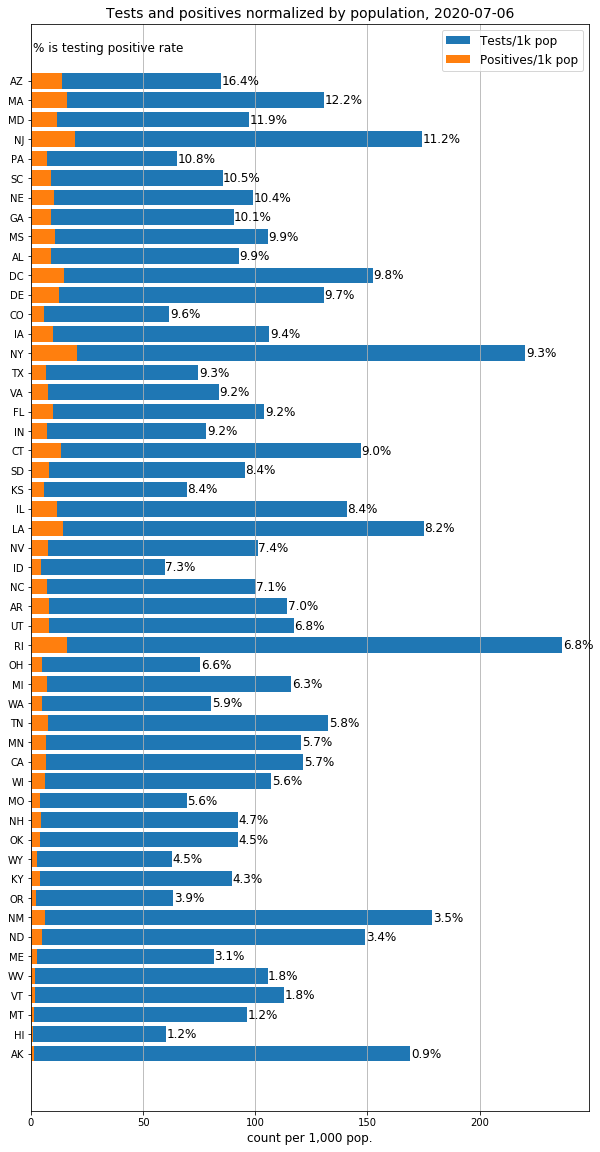

In [76]:
covidtracking = pd.read_csv('../other3p/covidtracking_daily.csv')
covidtracking['date'] = pd.to_datetime(covidtracking['date'],format="%Y%m%d")
maxDate = max(covidtracking['date'])
positives = covidtracking.pivot(index='date',columns='state', values='positive')
positives=positives.fillna(0)
negatives = covidtracking.pivot(index='date',columns='state', values='negative')
negatives=negatives.fillna(0)

statecodes = pd.read_csv('../expdev07/statecodes.tsv', sep='\t',names=['Abbrev','State'])
statecodes = dict(zip(statecodes['State'],statecodes['Abbrev']))

pop = pd.read_csv('../other3p/state_pop.txt', sep='\t', names=['State','Pop'])
pop = dict(zip([statecodes[c.replace('.','')] for c in pop['State']],pop['Pop']))
#icu
#print(pop,positives.columns)
cols = sorted([c for c in positives.columns if c in pop], reverse=True)
data = list(zip(cols, [max(positives[c])*1e3/pop[c] for c in cols], [max(positives[c]+negatives[c])*1e3/pop[c] for c in cols]))
data = list(sorted(data, key=lambda x: x[1]/x[2]))
plt.rcParams["figure.figsize"] = [10, 20]
fig, ax = plt.subplots()
labels = [c for (c,_,_) in data]
ax.grid(b=True,axis='x')
ax.barh(labels, [x for (_,_,x) in data])
ax.barh(labels, [x for (_,x,_) in data])
for y,d in enumerate(data):
    (_,p,t) = d
    ax.text(t+0.25, y, '{:.1f}%'.format((p/t)*100),size=12,      ha='left', va='center')
ax.text(1,len(data)+0.5, '% is testing positive rate', size=12)
font = font_manager.FontProperties(family='sans-serif',
                                   weight='normal',
                                   style='normal', size=12)
#ax.title('Per state estimated active cases vs ICU beds.')
ax.legend(['Tests/1k pop','Positives/1k pop'], prop=font)
ax.set_title('Tests and positives normalized by population, {}'.format(maxDate.strftime('%Y-%m-%d')),size=14)
ax.set_xlabel('count per 1,000 pop.', size=12)
save_figure(maxDate,'17_tests.png')

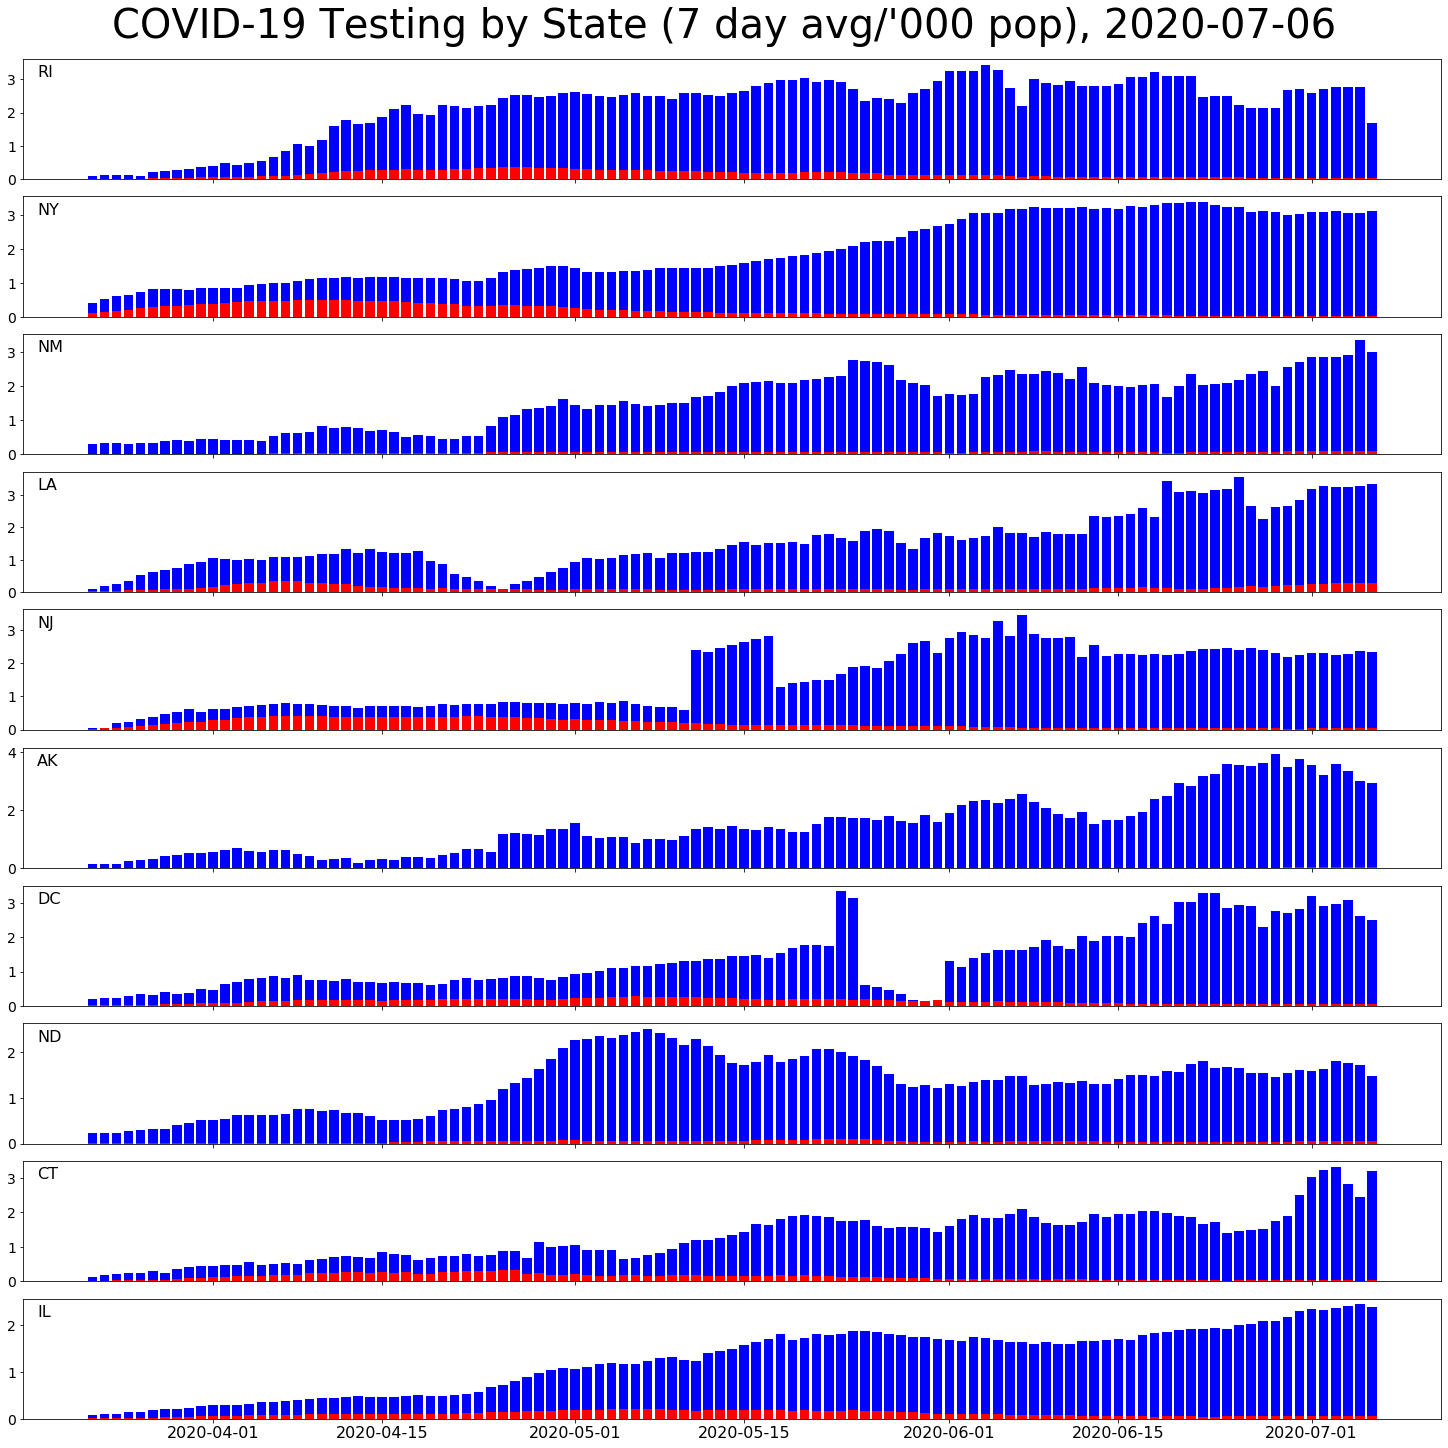

In [77]:
covidtracking = pd.read_csv('../other3p/covidtracking_daily.csv')
covidtracking['date'] = pd.to_datetime(covidtracking['date'],format="%Y%m%d")
maxDate = max(covidtracking['date'])
positives = covidtracking.pivot(index='date',columns='state', values='positive')
positives=positives.fillna(0)
negatives = covidtracking.pivot(index='date',columns='state', values='negative')
negatives=negatives.fillna(0)

statecodes = pd.read_csv('../expdev07/statecodes.tsv', sep='\t',names=['Abbrev','State'])
statecodes = dict(zip(statecodes['State'],statecodes['Abbrev']))

pop = pd.read_csv('../other3p/state_pop.txt', sep='\t', names=['State','Pop'])
pop = dict(zip([statecodes[c.replace('.','')] for c in pop['State']],pop['Pop']))
#icu
#print(pop,positives.columns)
cols = sorted([c for c in positives.columns if c in pop], key=lambda x: max(positives[x]+negatives[x])*1e3/pop[x], reverse=True)[:10]
dates=positives.index

window = 7
pos_inc = {}
tot_inc = {}

for c in cols:
    pos = positives[c].fillna(0)*1e3/pop[c]
    tot = (positives[c]+negatives[c]).fillna(0)*1e3/pop[c]
    pos_inc[c]=[0]*window+[max(0,(pos[j]-pos[j-window])/window) for j in range(window,len(pos))]
    tot_inc[c]=[0]*window+[max(0,(tot[j]-tot[j-window])/window) for j in range(window,len(tot))]    

offset = 60
    
def plotBars(countries):
    plt.rcParams["figure.figsize"] = [20, 2*len(countries)]
    fig, axs = plt.subplots(len(countries),1, sharex=True,constrained_layout=True)
    for (i,(country,ax)) in enumerate(zip(countries,axs)):
        ax.bar(dates[offset:],tot_inc[country][offset:], color='blue')
        ax.bar(dates[offset:],pos_inc[country][offset:], color='red')
        #ax.plot(dates[offset:],line[country][offset:], color='black')
        #ax.bar(confirmed.index,recovered, color='red')
        
        ax.text(0.01,0.85,country, transform=ax.transAxes, ha='left', size=16)
        ax.tick_params(axis = 'x', which = 'major', labelsize = 16)
        ax.tick_params(axis = 'y', which = 'major', labelsize = 14)
    fig.suptitle('COVID-19 Testing by State ({} day avg/\'000 pop), {}'.format(window, maxDate.strftime('%Y-%m-%d')),size=40)   
plotBars(cols)
save_figure(maxDate,'50_tests.png')

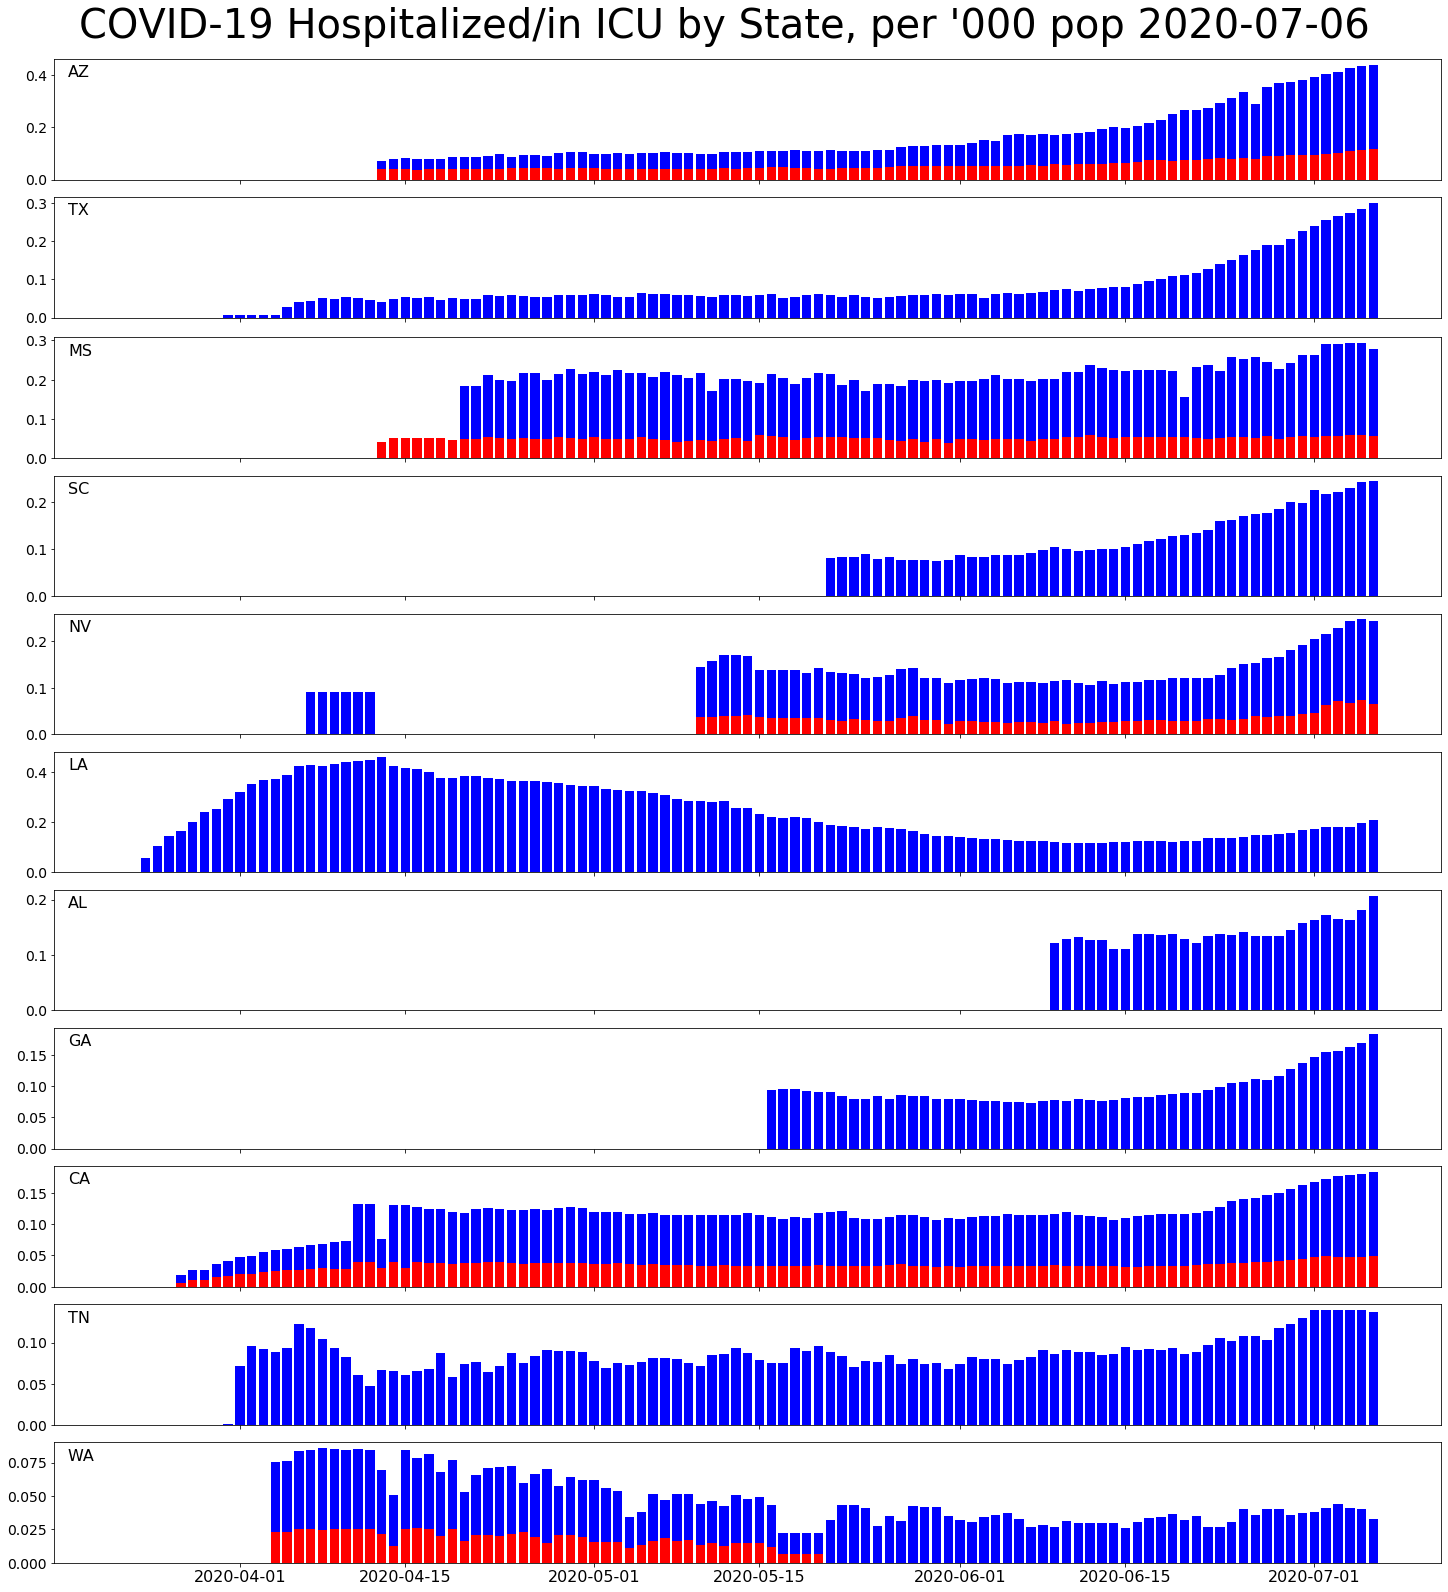

In [78]:
covidtracking = pd.read_csv('../other3p/covidtracking_daily.csv')
covidtracking['date'] = pd.to_datetime(covidtracking['date'],format="%Y%m%d")
maxDate = max(covidtracking['date'])
positives = covidtracking.pivot(index='date',columns='state', values='inIcuCurrently')
positives=positives.fillna(0)
negatives = covidtracking.pivot(index='date',columns='state', values='hospitalizedCurrently')
negatives=negatives.fillna(0)

statecodes = pd.read_csv('../expdev07/statecodes.tsv', sep='\t',names=['Abbrev','State'])
statecodes = dict(zip(statecodes['State'],statecodes['Abbrev']))

pop = pd.read_csv('../other3p/state_pop.txt', sep='\t', names=['State','Pop'])
pop = dict(zip([statecodes[c.replace('.','')] for c in pop['State']],pop['Pop']))
#icu
#print(pop,positives.columns)
cols = sorted([c for c in positives.columns if c in pop], key=lambda x: negatives[x][-1]*1e3/pop[x], reverse=True)[:10]
if 'WA' not in cols:
    cols.append('WA')
dates=positives.index

window = 1
pos_inc = {}
tot_inc = {}

for c in cols:
    pos = positives[c].fillna(0)*1e3/pop[c]
    tot = negatives[c].fillna(0)*1e3/pop[c]
    pos_inc[c]=[0]*window+[pos[j] for j in range(window,len(pos))]
    tot_inc[c]=[0]*window+[tot[j] for j in range(window,len(tot))]    

#    tot = (positives[c]+negatives[c]).fillna(0)*1e3/pop[c]
#    pos_inc[c]=[0]*window+[max(0,(pos[j]-pos[j-window])/window) for j in range(window,len(pos))]
#    tot_inc[c]=[0]*window+[max(0,(tot[j]-tot[j-window])/window) for j in range(window,len(tot))]    
offset = 60

def plotBars(countries):
    plt.rcParams["figure.figsize"] = [20, 2*len(countries)]
    fig, axs = plt.subplots(len(countries),1, sharex=True,constrained_layout=True)
    for (i,(country,ax)) in enumerate(zip(countries,axs)):
        ax.bar(dates[offset:],tot_inc[country][offset:], color='blue')
        ax.bar(dates[offset:],pos_inc[country][offset:], color='red')
        #ax.plot(dates[offset:],line[country][offset:], color='black')
        #ax.bar(confirmed.index,recovered, color='red')
        
        ax.text(0.01,0.85,country, transform=ax.transAxes, ha='left', size=16)
        ax.tick_params(axis = 'x', which = 'major', labelsize = 16)
        ax.tick_params(axis = 'y', which = 'major', labelsize = 14)
    fig.suptitle('COVID-19 Hospitalized/in ICU by State, per \'000 pop {}'.format(maxDate.strftime('%Y-%m-%d')),size=40)   
plotBars(cols)
save_figure(maxDate,'51_hosp.png')

In [79]:
# Positive rate = p(pos|sympt)*p(test|sympt)*p(sympt) + p(pos|asympt)*p(test|asympt)*p(asympt) 
# In states with highest positive rate, assume p(test|sympt) is ~1 and p(test|asympt) is ~0
data_aug = [(s,p,t,p/t) for (s,p,t) in data]
top_pos_sympt = [pp for (s, p, t,pp) in sorted(data_aug, key=lambda x: x[3], reverse=True)[:5]]
pos_sympt = (np.mean(top_pos_sympt,axis=0),np.std(top_pos_sympt, axis=0))
print(pos_sympt)

# States with lowest positive rate: assume these states are identifying all cases.
# Also assume the ratio of asump/(sympt+asymp) cases is the same everywhere. We can let this range from [0.1:0.5]
asymp_frac = np.arange(0.1,1.1,0.1)
print(asymp_frac)
(s,p,t,pp) = sorted(data_aug, key = lambda x: x[3])[0]
print(s,p,t,pp)
sympt_test = [p*(1-f)/pos_sympt[0] for f in asymp_frac]  # how many tests must be symptomatic
print(sympt_test)
asympt_test = [t - s for s in sympt_test] # tests must be asymptomatic
print(asympt_test) 
asympt_pos = [f*p for f in asymp_frac]
print(asympt_pos)
asympt_pos_rate = [f*p/(t-(p*(1-f)/pos_sympt[0])) for f in asymp_frac]

# take a state in the middle.
(s,p,t,pp) = sorted(data_aug, key = lambda x: x[3])[25]
# some 
    
# what fraction of asympt tests are positive? in this example it's 0 since we attributed all the positives to symptomatic tests
#plt.plot([x for x in range(0,int(t))], [pos_sympt[0]*x for x in range(0,int(t))])


(0.12521680235399252, 0.020108053014301446)
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
AK 1.555611753207253 169.16662679671106 0.009195736669010045
[11.181012065206179, 9.938677391294382, 8.696342717382583, 7.454008043470785, 6.211673369558988, 4.969338695647191, 3.727004021735392, 2.4846693478235946, 1.2423346739117973, 0.0]
[157.98561473150488, 159.22794940541667, 160.47028407932848, 161.71261875324026, 162.95495342715208, 164.19728810106386, 165.43962277497567, 166.68195744888746, 167.92429212279927, 169.16662679671106]
[0.15556117532072533, 0.31112235064145066, 0.466683525962176, 0.6222447012829013, 0.7778058766036265, 0.9333670519243518, 1.0889282272450773, 1.2444894025658026, 1.4000505778865278, 1.555611753207253]


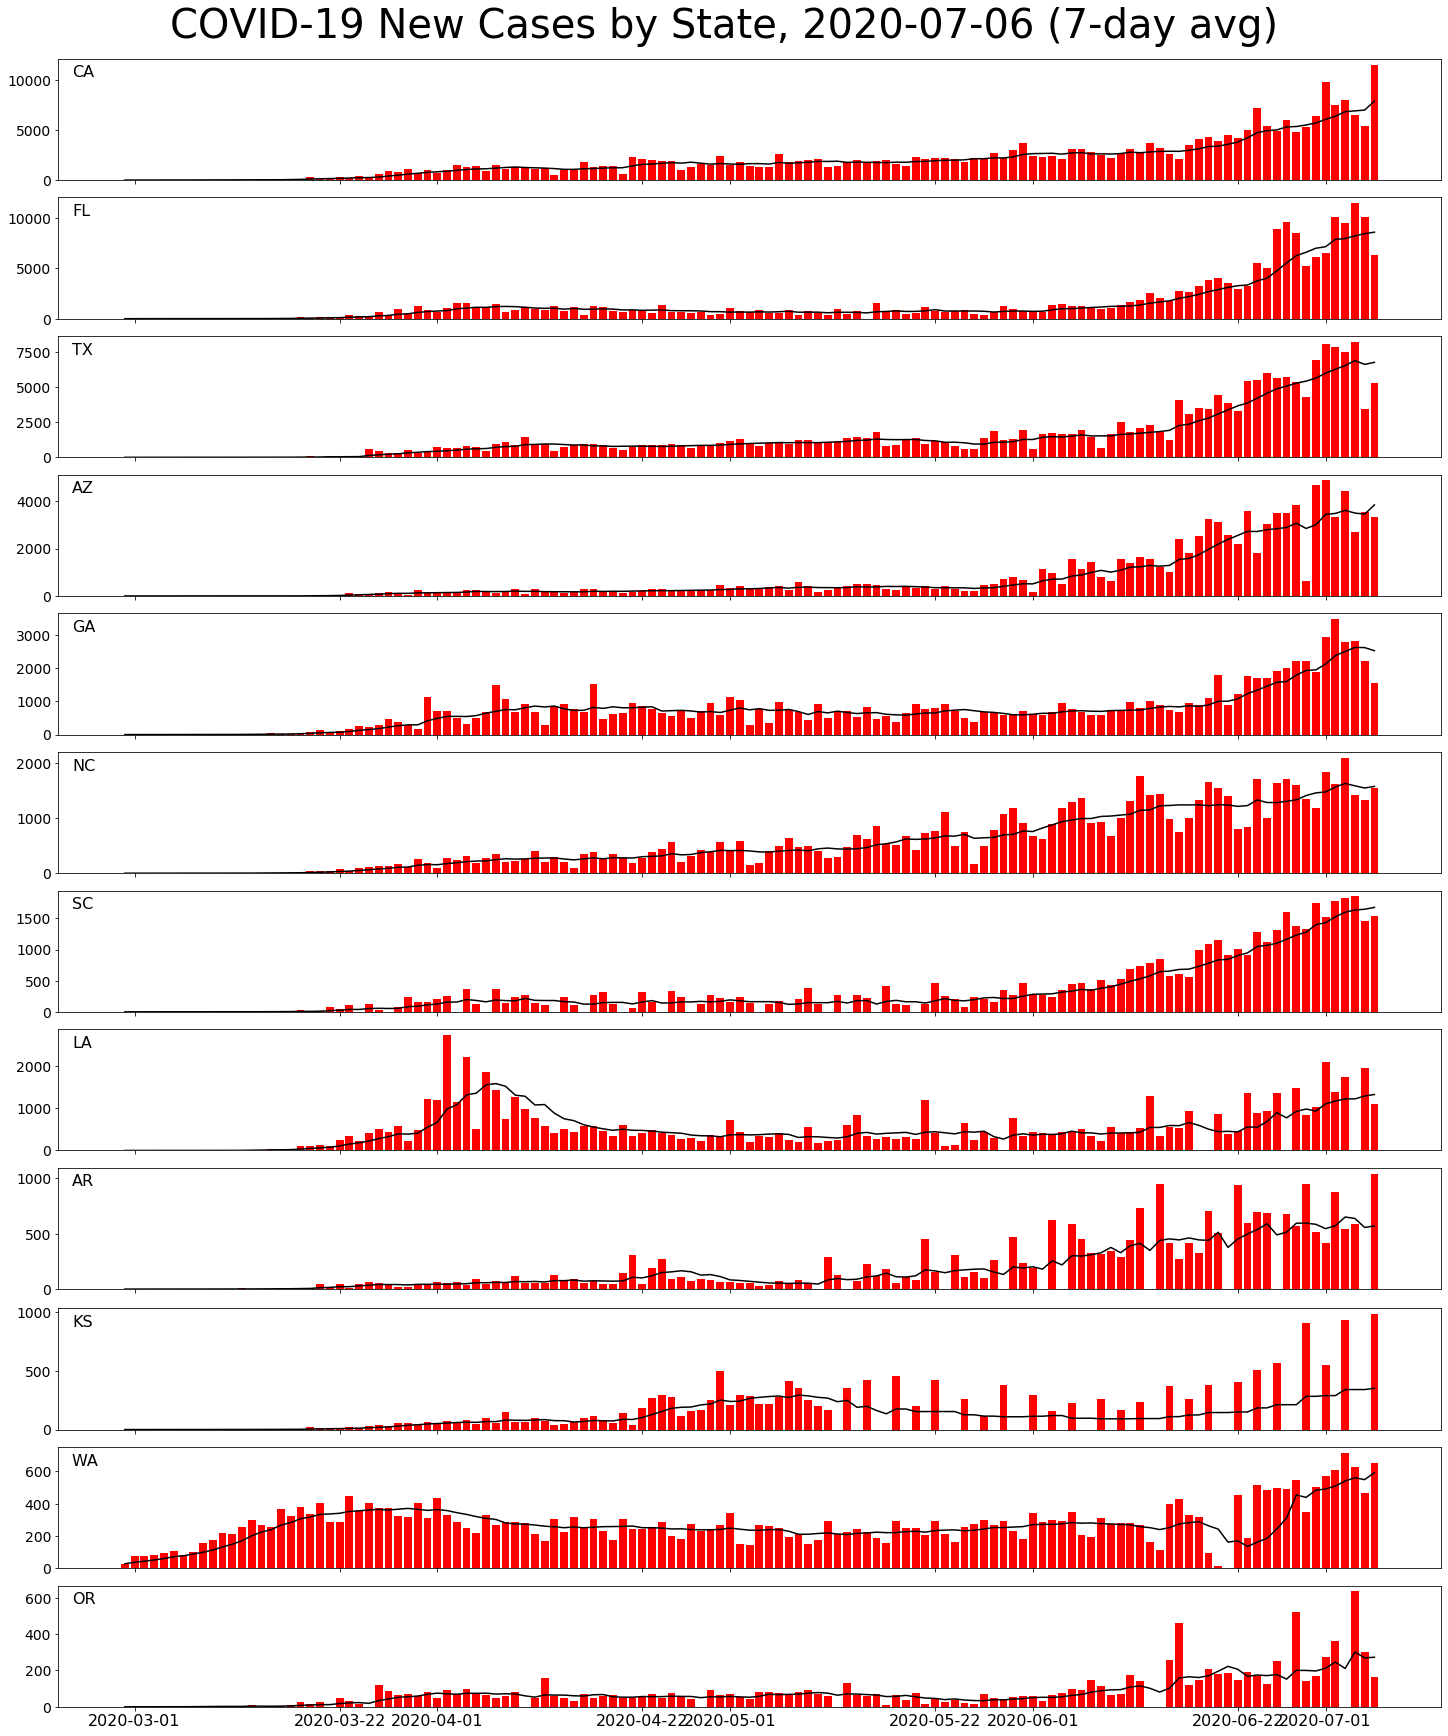

In [80]:
covidtracking = pd.read_csv('../other3p/covidtracking_daily.csv')
covidtracking['date'] = pd.to_datetime(covidtracking['date'],format="%Y%m%d")
maxDate = max(covidtracking['date'])
#increase = covidtracking.pivot(index='date',columns='state', values='positiveIncrease')
confirmed = covidtracking.pivot(index='date',columns='state', values='positive')

increase = {}
line = {}
window = 7
dates = confirmed.index #[window:]
for c in confirmed:
    cnf = confirmed[c].fillna(0)    
    line[c]=[0]*window+[max(0,(cnf[j]-cnf[j-window])/window) for j in range(window,len(cnf))]
    increase[c]=[0]+[max(0,(cnf[j]-cnf[j-1])) for j in range(1,len(cnf))]

#deaths = covidtracking.pivot(index='date',columns='state', values='death')
#offset = 18

#df = df[[c for c in df.columns if df[c].max()>1000]]

maxDate=max(confirmed.index)

offset=38

def plotBars(countries):
    plt.rcParams["figure.figsize"] = [20, 2*len(countries)]
    fig, axs = plt.subplots(len(countries),1, sharex=True,constrained_layout=True)
    for (i,(country,ax)) in enumerate(zip(countries,axs)):
        ax.bar(dates[offset:],increase[country][offset:], color='red')
        ax.plot(dates[offset:],line[country][offset:], color='black')
        #ax.bar(confirmed.index,recovered, color='red')
        
        ax.text(0.01,0.85,country, transform=ax.transAxes, ha='left', size=16)
        ax.tick_params(axis = 'x', which = 'major', labelsize = 16)
        ax.tick_params(axis = 'y', which = 'major', labelsize = 14)
    fig.suptitle('COVID-19 New Cases by State, {} ({}-day avg)'.format(maxDate.strftime('%Y-%m-%d'), window),size=40)        

statesToPlot = sorted(increase, key=lambda c: increase[c][-1], reverse=True)[:10]
for s in ['WA','GA', 'OR']:
    if s not in statesToPlot:
        statesToPlot.append(s)

#plotBars(['WA','NY','CA','NJ','MA','LA','FL'])
plotBars(statesToPlot)

#print(maxDate)
save_figure(maxDate,'18_newcases.png')

date
2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
              ...  
2020-07-01    46712
2020-07-02    48105
2020-07-03    42223
2020-07-04    37923
2020-07-05    26051
Name: Brazil, Length: 166, dtype: int64
Index(['World', 'US', 'Brazil', 'India', 'South Africa', 'Russia', 'Pakistan',
       'Mexico', 'Colombia', 'Chile', 'Canada', 'Australia', 'New Zealand',
       'Sweden'],
      dtype='object')


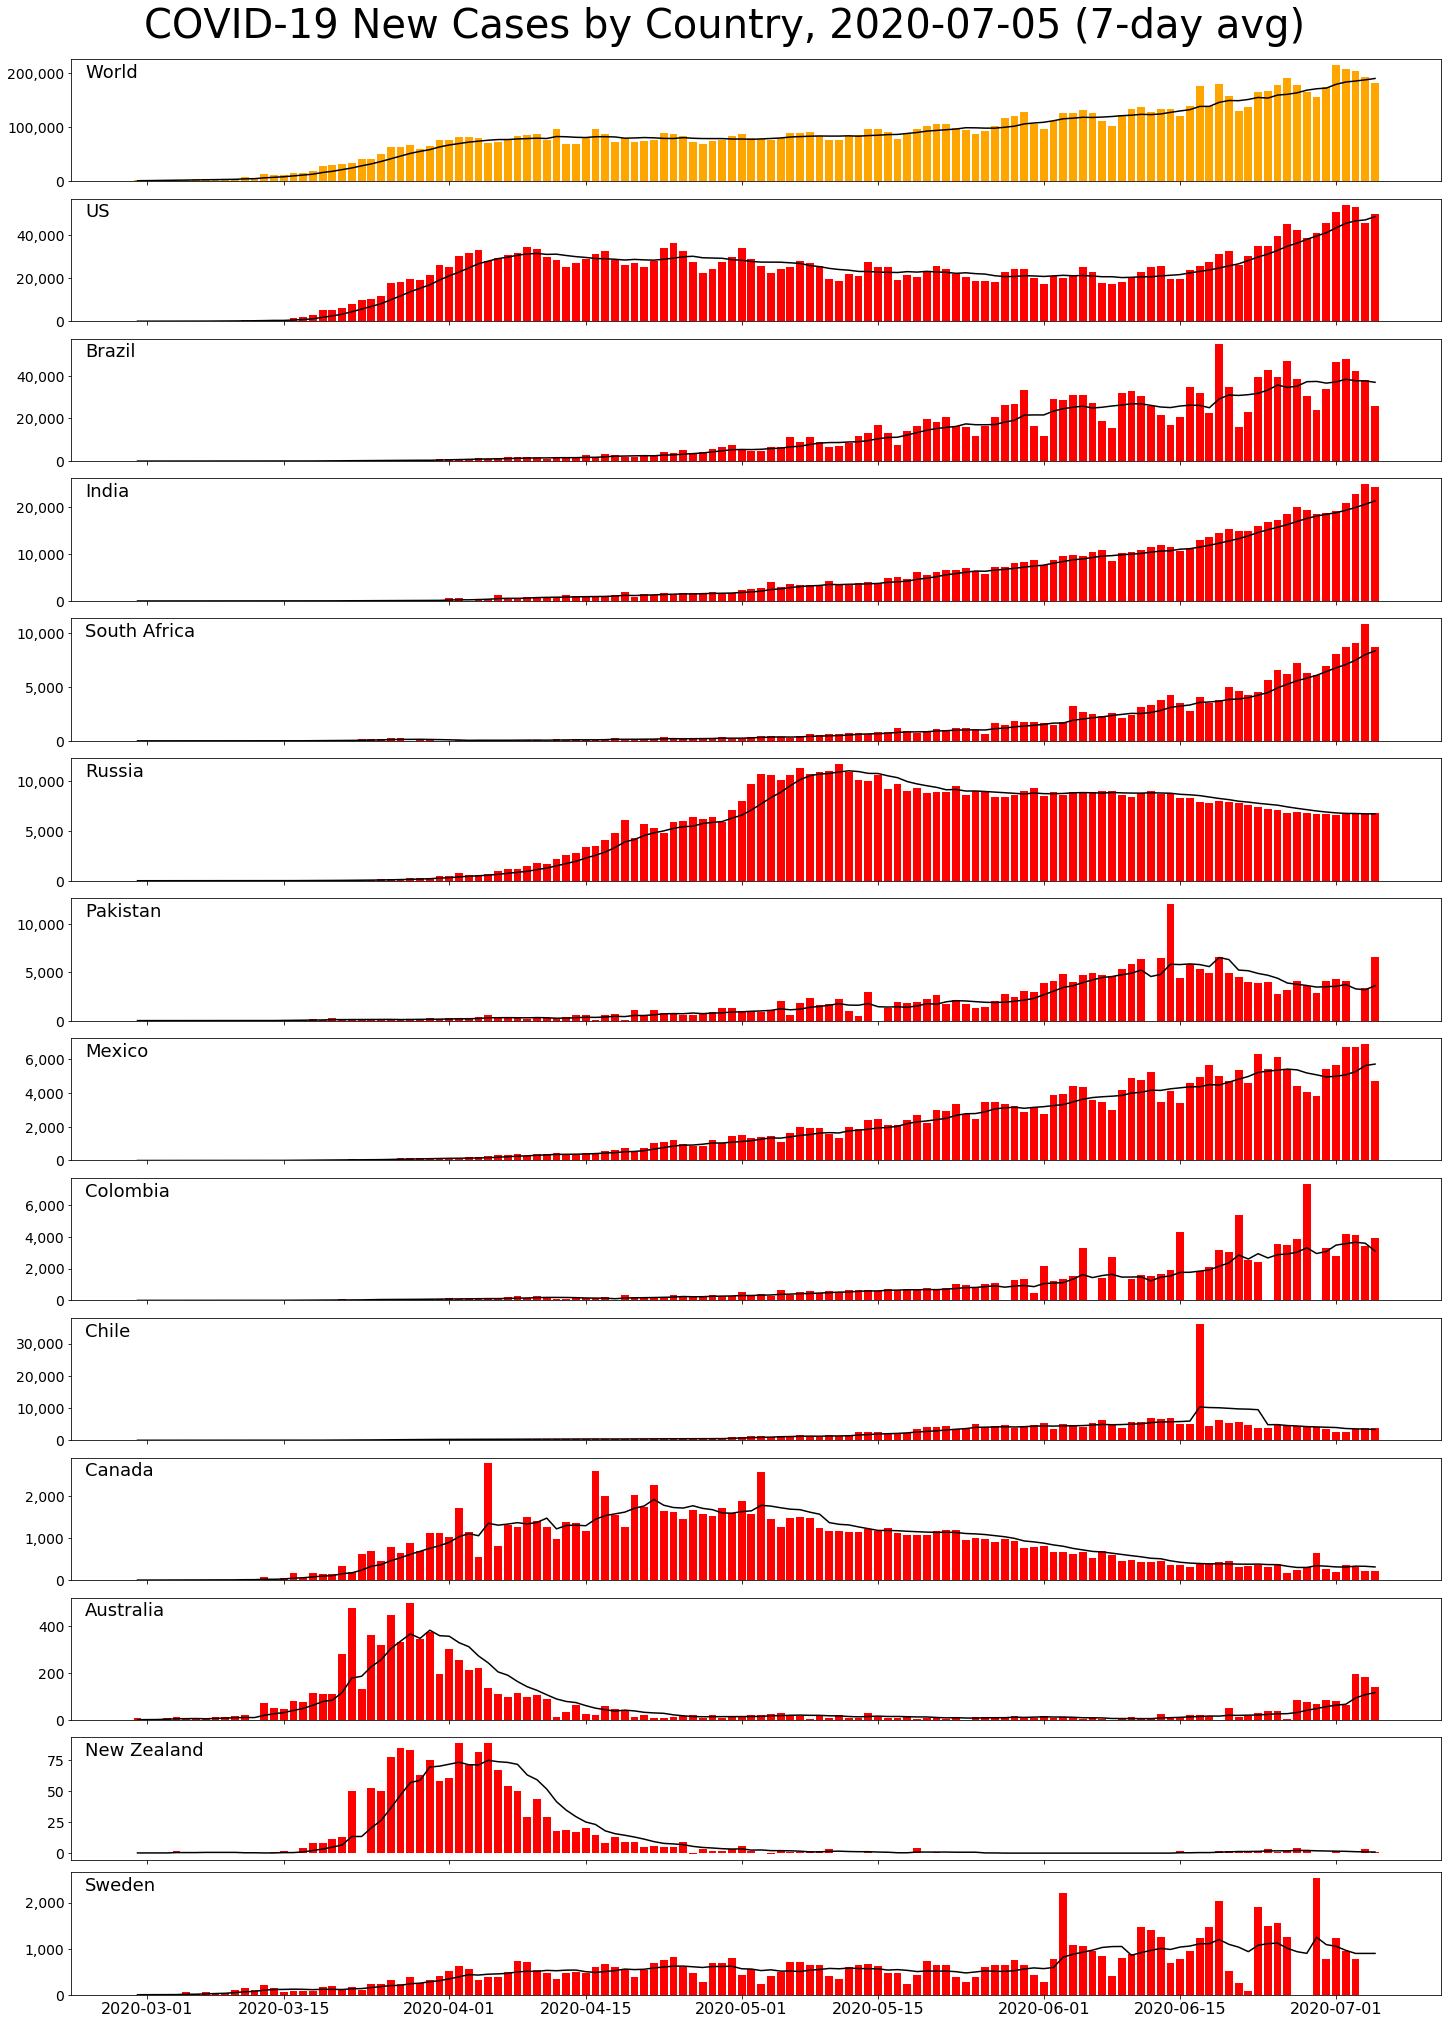

In [81]:
df = raw
#df['Region']= (df['Province/State'].fillna('')+', '+df['Country/Region']).apply(lambda x: x if x[0]!=',' else x[2:])
df['Region'] = df['Country/Region']
#print(df['Region'])
df=df.groupby('Region').sum()

# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]
#threshold=50
#df = df[df[last_date]>threshold]
#df = df[df.index.isin(['US','France','Germany','Italy','Spain'])]
#df = df.groupby(df.index=='US').sum()
#df.index = ['World']

df['Region']=df.index
df=df.melt(id_vars='Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Region')
df['date']=pd.to_datetime(df.index)

df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]

line={'World':[0]*len(df['Canada'])}
df['World'] = [0]*len(df['Canada'])
window = 7
for c in df.columns:
    if c=='World':
        continue
    line[c] = [0]*window+[(df[c][i]-df[c][i-window])/window for i in range(window,len(df[c]))]
    df[c] = [0]+[(df[c][i]-df[c][i-1]) for i in range(1,len(df[c]))]
    line['World'] = np.add(line['World'],line[c])    
    df['World'] = np.add(df['World'],df[c])
    #print(line[c],line['World'])
print(df['Brazil'])
countries = [c for c in sorted(df.columns, key=lambda x: df[x][-1], reverse=True)[:10]]
for c in ['Canada','Australia','New Zealand', 'Sweden']:
    if c not in countries:
        countries.append(c)
df = df[countries]
       
print(df.columns)
countries=df.columns
# Jan 22 is the start. So index from 38: for March 1 
offset = 38
dates=df.index[offset:]
maxDate = max(df.index)
plt.rcParams["figure.figsize"] = [20, 2*len(countries)]
fig, axs = plt.subplots(len(countries),1, sharex=True,constrained_layout=True)
for (i,(country,ax)) in enumerate(zip(countries,axs)):
    color='orange' if country=='World' else 'red'
    ax.bar(dates,df[country][offset:], color=color)
    ax.plot(dates,line[country][offset:], color='black')
    #ax.bar(confirmed.index,recovered, color='red')
    ax.get_yaxis().set_major_formatter(
        ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.text(0.01,0.85,country, transform=ax.transAxes, ha='left', size=18)
    ax.tick_params(axis = 'x', which = 'major', labelsize = 16)
    ax.tick_params(axis = 'y', which = 'major', labelsize = 14)
    
fig.suptitle('COVID-19 New Cases by Country, {} ({}-day avg)'.format(maxDate.strftime('%Y-%m-%d'),window),size=40)        
    

save_figure(maxDate,'19_newcases_country.png')

In [82]:
df['World'][-1]

183082

Index(['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories', 'Nova Scotia',
       'Ontario', 'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Yukon'],
      dtype='object')


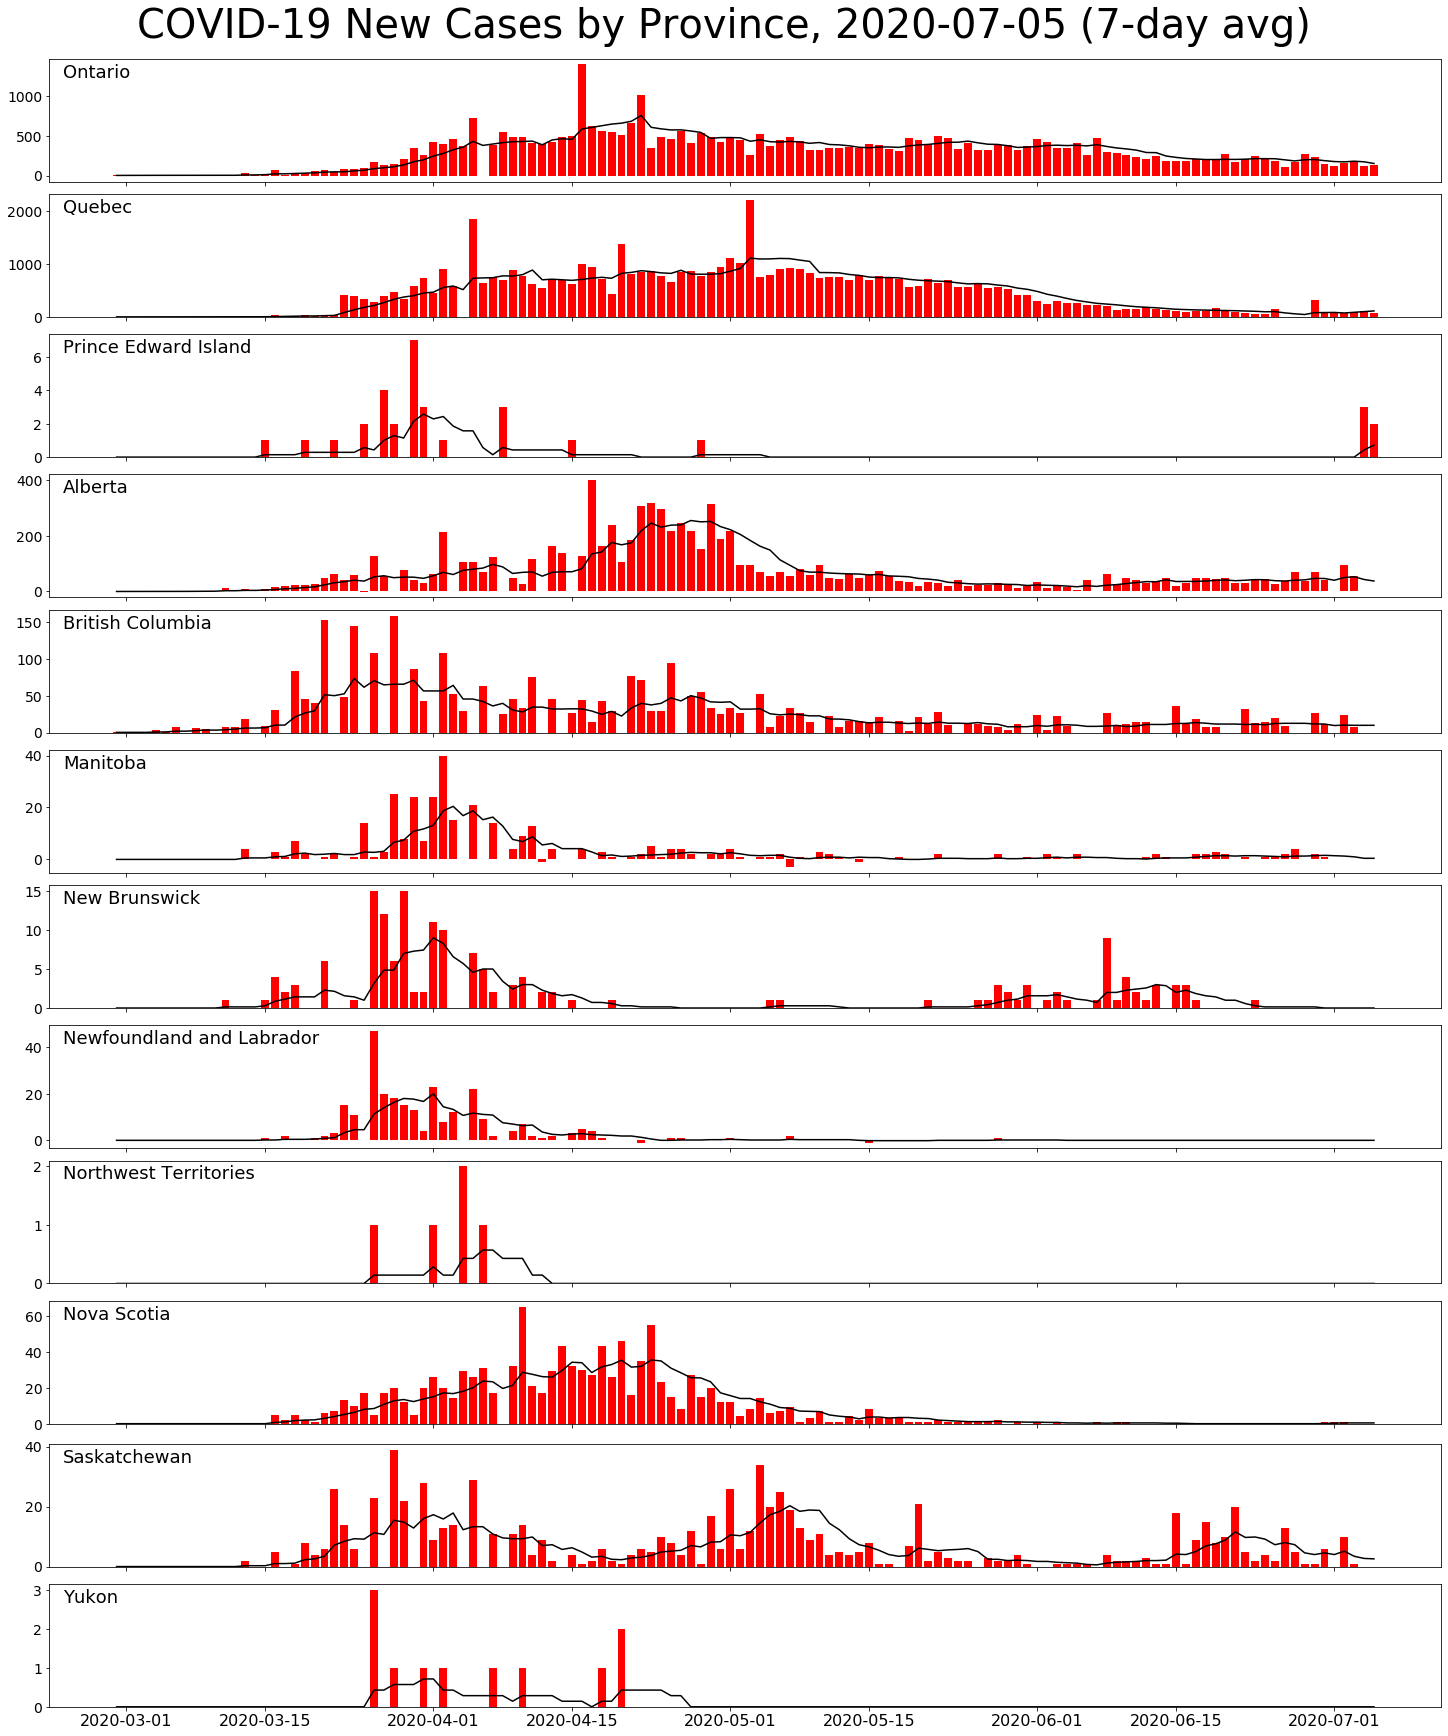

In [83]:

df = raw[raw['Country/Region']=='Canada']
df=df.groupby('Province/State').sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]

df['Province']=df.index
df=df.melt(id_vars='Province',var_name='date', value_name='Confirmed').pivot(index='date',columns='Province')
df['date']=pd.to_datetime(df.index)

df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
for c in ['Recovered', 'Diamond Princess', 'Grand Princess']:
    if c in df:
        del df[c] 

line={}
window = 7
for c in df.columns:
    line[c] = [0]*window+[(df[c][i]-df[c][i-window])/window for i in range(window,len(df[c]))]
    df[c] = [0]+[(df[c][i]-df[c][i-1]) for i in range(1,len(df[c]))]
    
#df = df[[c for c in sorted(df.columns, key=lambda x: df[x][-1], reverse=True)[:10]+['Australia','New Zealand']]]
print(df.columns)
countries=sorted(df.columns, key=lambda x: df[x][-1], reverse=True)
# Jan 22 is the start. So index from 38: for March 1 
offset = 38
dates=df.index[offset:]
maxDate = max(df.index)
plt.rcParams["figure.figsize"] = [20, 2*len(countries)]
fig, axs = plt.subplots(len(countries),1, sharex=True,constrained_layout=True)
for (i,(country,ax)) in enumerate(zip(countries,axs)):
    ax.bar(dates,df[country][offset:], color='red')
    ax.plot(dates,line[country][offset:], color='black')
    #ax.bar(confirmed.index,recovered, color='red')
    ax.text(0.01,0.85,country, transform=ax.transAxes, ha='left', size=18)
    ax.tick_params(axis = 'x', which = 'major', labelsize = 16)
    ax.tick_params(axis = 'y', which = 'major', labelsize = 14)
    
fig.suptitle('COVID-19 New Cases by Province, {} ({}-day avg)'.format(maxDate.strftime('%Y-%m-%d'),window),size=40)        
    

save_figure(maxDate,'20_newcases_province.png')

Index(['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories', 'Nova Scotia',
       'Ontario', 'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Yukon'],
      dtype='object')


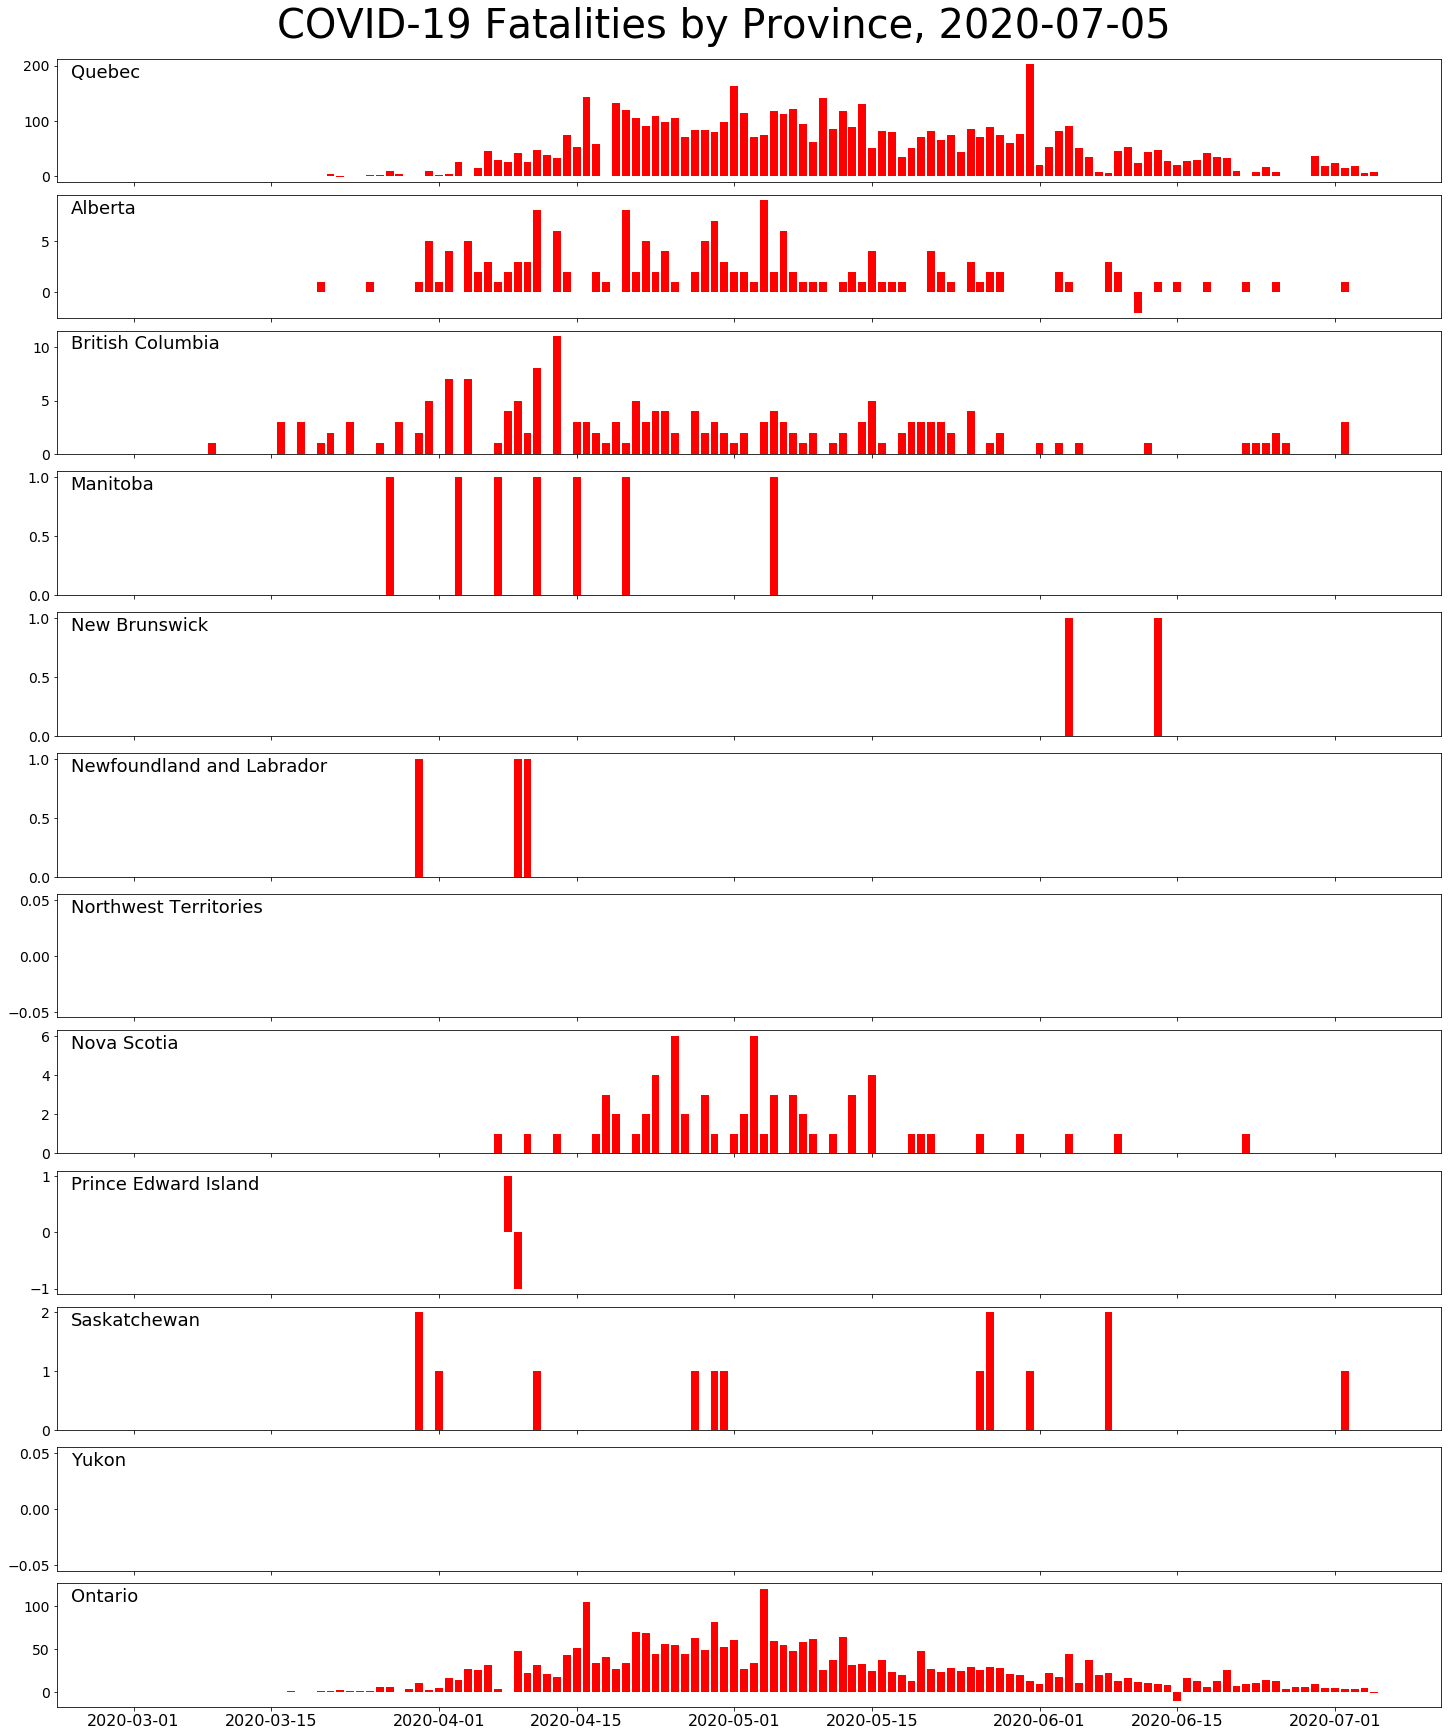

In [84]:

df = raw_deaths[raw_deaths['Country/Region']=='Canada']
df=df.groupby('Province/State').sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]

df['Province']=df.index
df=df.melt(id_vars='Province',var_name='date', value_name='Confirmed').pivot(index='date',columns='Province')
df['date']=pd.to_datetime(df.index)

df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
for c in ['Recovered', 'Diamond Princess', 'Grand Princess']:
    if c in df:
        del df[c] 

window = 1
for c in df.columns:
    df[c] = [0]*window+[(df[c][i]-df[c][i-window])/window for i in range(window,len(df[c]))]
    
#df = df[[c for c in sorted(df.columns, key=lambda x: df[x][-1], reverse=True)[:10]+['Australia','New Zealand']]]
print(df.columns)
countries=sorted(df.columns, key=lambda x: df[x][-1], reverse=True)
# Jan 22 is the start. So index from 38: for March 1 
offset = 38
dates=df.index[offset:]
maxDate = max(df.index)
plt.rcParams["figure.figsize"] = [20, 2*len(countries)]
fig, axs = plt.subplots(len(countries),1, sharex=True,constrained_layout=True)
for (i,(country,ax)) in enumerate(zip(countries,axs)):
    ax.bar(dates,df[country][offset:], color='red')
    #ax.bar(confirmed.index,recovered, color='red')
    ax.text(0.01,0.85,country, transform=ax.transAxes, ha='left', size=18)
    ax.tick_params(axis = 'x', which = 'major', labelsize = 16)
    ax.tick_params(axis = 'y', which = 'major', labelsize = 14)
    
fig.suptitle('COVID-19 Fatalities by Province, {}'.format(maxDate.strftime('%Y-%m-%d')),size=40)        
    

save_figure(maxDate,'21_fatalities_province.png')

['China', 'India', 'US', 'Indonesia', 'Pakistan', 'Brazil', 'Nigeria', 'Bangladesh', 'Russia', 'Mexico', 'Japan', 'Ethiopia', 'Philippines', 'Egypt', 'Turkey', 'Iran', 'Germany', 'Thailand', 'United Kingdom', 'France', 'Italy', 'South Africa', 'Kenya', 'Korea, South']
[[2.30103    1.        ]
 [5.97623852 1.        ]] [2.01639499e+01 2.55727236e+05]
['Colombia', 'Spain', 'Argentina', 'Algeria', 'Sudan', 'Ukraine', 'Iraq', 'Afghanistan', 'Poland', 'Canada', 'Morocco', 'Saudi Arabia', 'Uzbekistan', 'Peru', 'Malaysia', 'Ghana', 'Yemen', 'Nepal', 'Madagascar', 'Cameroon', 'Australia', 'Niger', 'Sri Lanka', 'Mali']
[[2.30103    1.        ]
 [5.03179209 1.        ]] [   23.5579533  22880.54830407]
['Romania', 'Malawi', 'Chile', 'Kazakhstan', 'Zambia', 'Guatemala', 'Ecuador', 'Netherlands', 'Senegal', 'Somalia', 'Guinea', 'Rwanda', 'Benin', 'Tunisia', 'Belgium', 'Haiti', 'Cuba', 'South Sudan', 'Dominican Republic', 'Czechia', 'Greece', 'Jordan', 'Portugal', 'Azerbaijan', 'Sweden']
[[2.30103  

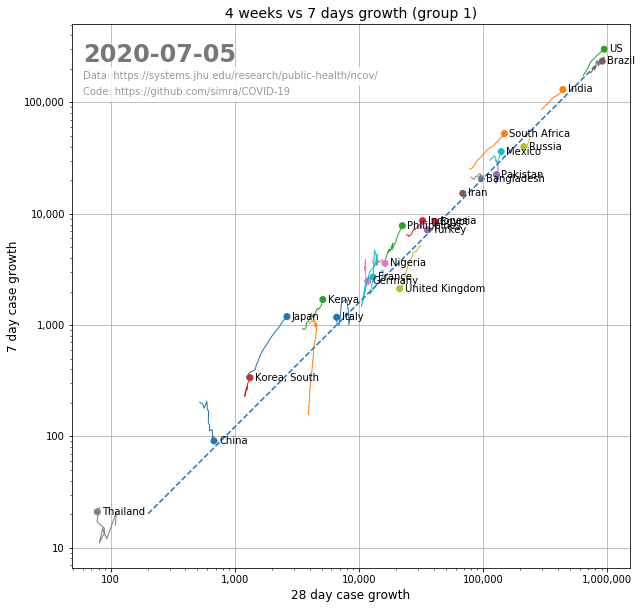

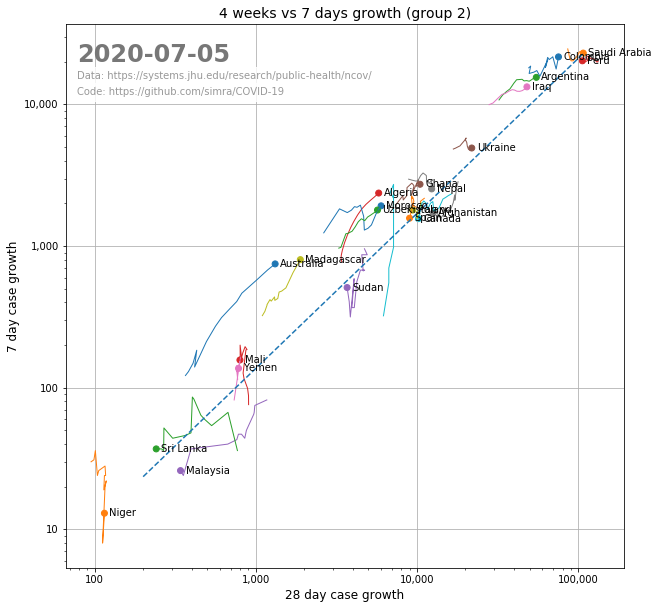

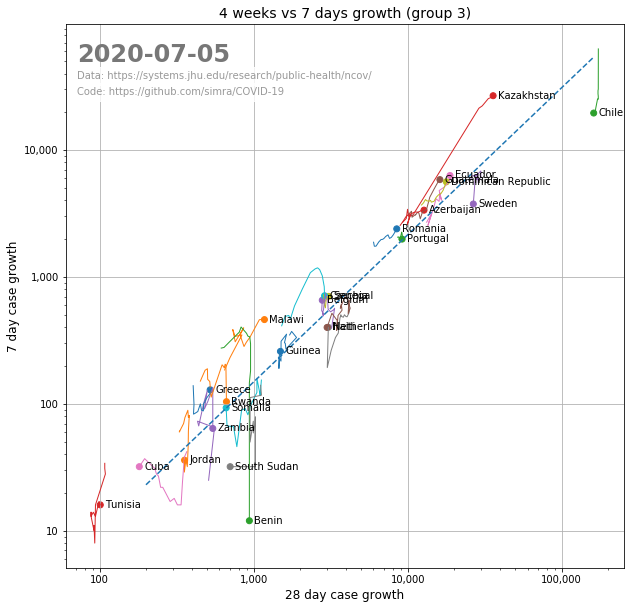

In [85]:
df=raw.groupby('Country/Region').sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]

df = df[(df.index.isin(['Canada','Japan', 'Australia'])) | (df[last_date]>1000)]

df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)

df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
#del df['Cruise Ship']
maxDate=max(df.index)


wpp = pd.read_csv('../wpp/WPP2019_TotalPopulationBySex.csv')
wpp=wpp[(wpp['Time']==2020) & (wpp['Variant']=='Medium')]
wpp = dict(zip(wpp['Location'],wpp['PopTotal']))
wpp['Iran']=wpp['Iran (Islamic Republic of)']
wpp['US']=wpp['United States of America']
wpp['Korea, South']= wpp['Republic of Korea']
wpp['Russia'] = wpp['Russian Federation']

columnsFiltered = [c for c in df.columns if c in wpp and wpp[c]>=10000]
df = df[columnsFiltered]
#for c in df.columns:
#    df[c]=df[c]/wpp[c]
#print(df.columns)

for i in range(3):
    plt.rcParams["figure.figsize"] = [10, 10]
    fig, ax = plt.subplots()
    growth = {}
    growth_l = {}
    points = []
    start = int(i*len(df.columns)/3)
    end = int((i+1)*len(df.columns)/3)
    columns = sorted(df.columns, key=lambda x:wpp[x], reverse=True)[start:end]
    print(columns)
    markers = [item for sublist in ['oxds+*']*ceil(len(columns)/5) for item in sublist]    
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    colorsToUse=colors*ceil(len(columns)/len(colors))
    long_window= 4*7
    start = long_window
    for c,m,col in zip(columns,markers,colorsToUse):
        #growth[c] = [(pow(df[c][i]/max(1.0,df[c][i-6]),1.0/7)-1)*100 if df[c][i]>200 else float('nan') for i in range(20,len(df[c]))]
        growth[c] = [df[c][i]-df[c][i-6] if (df[c][i]>200 and df[c][i]>df[c][i-6]) else float('nan') for i in range(start,len(df[c]))]
        growth_l[c] = [df[c][i]-df[c][i-long_window] if (df[c][i]>200 and df[c][i]>df[c][i-long_window]) else float('nan') for i in range(start,len(df[c]))]
        #growth[c] = [growth[c][i] if growth[c][i]<100 else float('nan') for i in range(len(growth[c]))]
        ax.plot(growth_l[c][-14:], growth[c][-14:], linewidth=1,color=col)
        points.append([growth_l[c][-1],growth[c][-1],c])

    ax.scatter([p[0] for p in points],[p[1] for p in points],color=colorsToUse[:len(points)])   
    for (x,y,txt) in points:
        ax.annotate(txt,(x,y), xytext=(5,0), va='center', textcoords='offset points')
    font = font_manager.FontProperties(family='sans-serif',
                                       weight='normal',
                                       style='normal', size=12)



    from math import log10 as log
    x = [log(growth_l[c][-1]) if growth_l[c][-1]>0 else 0 for c in growth]
    y = [log(growth[c][-1]) if growth[c][-1]>0 else 0 for c in growth]
    #print(x,y)
    model = np.polyfit(x,y,1)
    model
    model_x = np.array([[log(200),1],[max(x),1]])
    model_y = np.power(10,model_x.dot(model))
    print(model_x,model_y)
    ax.plot(np.power(10,model_x[:,0]), model_y, linestyle='--')

    ax.grid()
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.get_xaxis().set_major_formatter(
        ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.get_yaxis().set_major_formatter(
        ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    #ax.yaxis.set_label_position("right")
    #ax.set_ylim([0,50])
    ax.set_xlabel('28 day case growth', size=12)
    ax.set_ylabel('7 day case growth', size=12)
    ax.set_title('4 weeks vs 7 days growth (group {})'.format(i+1), size=14)
#ax.legend(df.columns, prop=font)    
#plt.ylim((0,100))
    ax.text(0.02, 0.93, maxDate.strftime('%Y-%m-%d'), transform=ax.transAxes, color='#777777', size=24, ha='left', weight=800)
    ax.text(0.02, 0.90, 'Data: https://systems.jhu.edu/research/public-health/ncov/', transform=ax.transAxes, ha='left', size=10,
            color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    ax.text(0.02, 0.87, 'Code: https://github.com/simra/COVID-19', transform=ax.transAxes, ha='left', size=10,
            color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    save_figure(maxDate,'10_c_{}_countvsgrowth_8week.png'.format(i))

{'King County': 2233163, 'Pierce County': 891299, 'Snohomish County': 814901, 'Spokane County': 514631, 'Clark County': 481857, 'Thurston County': 286419, 'Kitsap County': 269805, 'Yakima County': 251446, 'Whatcom County': 225685, 'Benton County': 201877, 'Skagit County': 128206, 'Cowlitz County': 108987, 'Grant County': 97331, 'Franklin County': 94347, 'Island County': 84460, 'Lewis County': 79604, 'Chelan County': 77036, 'Clallam County': 76737, 'Grays Harbor County': 73901, 'Mason County': 65507, 'Walla Walla County': 60922, 'Whitman County': 49791, 'Kittitas County': 47364, 'Stevens County': 45260, 'Douglas County': 42907, 'Okanogan County': 42132, 'Jefferson County': 31729, 'Asotin County': 22610, 'Klickitat County': 22107, 'Pacific County': 22036, 'Adams County': 19759, 'San Juan County': 17128, 'Pend Oreille County': 13602, 'Skamania County': 11924, 'Lincoln County': 10740, 'Ferry County': 7649, 'Wahkiakum County': 4426, 'Columbia County': 4059, 'Garfield County': 2247}
[5.83839

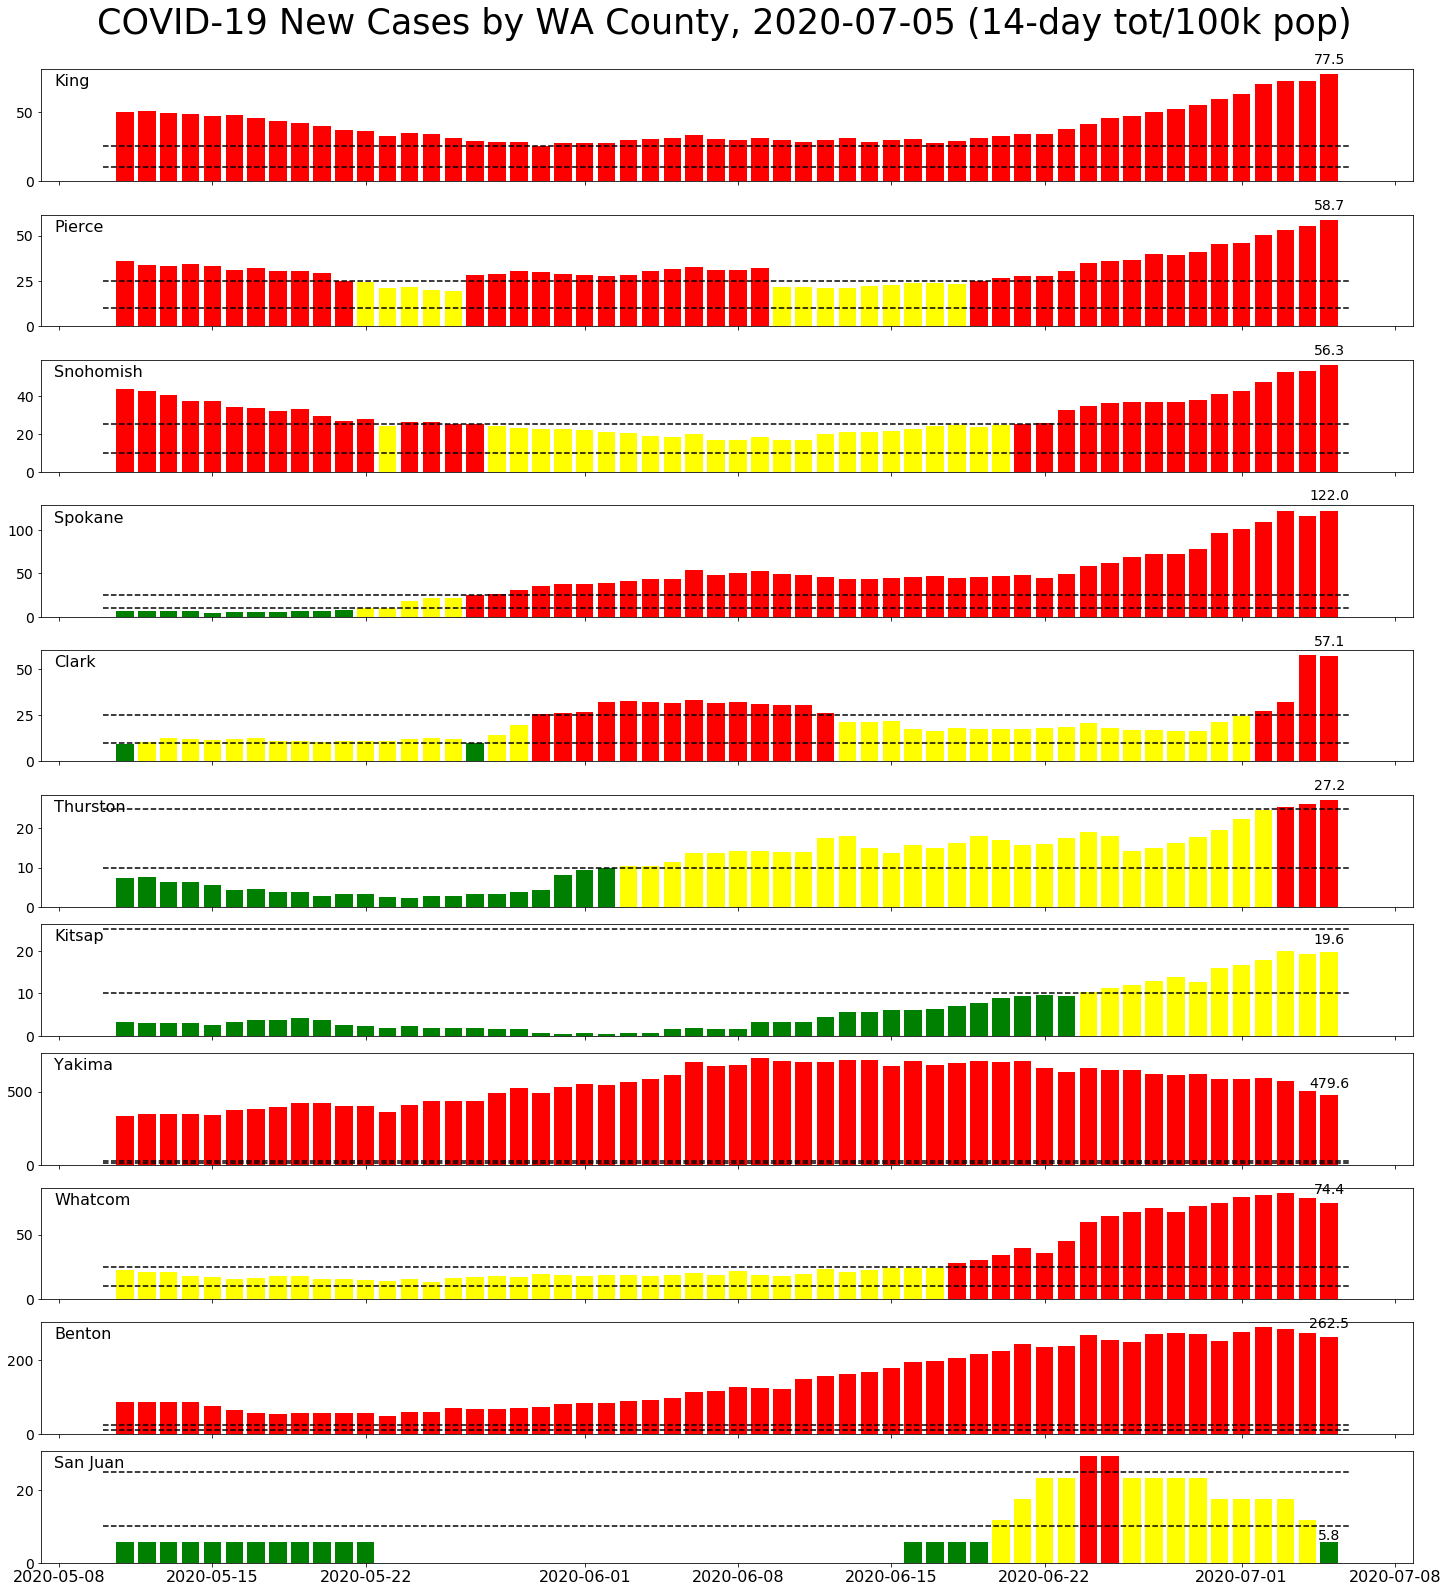

In [86]:
# Load Data
import json
def load_raw_counties(fn):
    datapath = os.path.join('../csse_covid_19_data/csse_covid_19_time_series/', fn)

    #datapath = '../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
    
    raw = pd.read_csv(datapath)
    #raw= raw.replace('Mainland China','China')
    raw = raw[raw.iso2=='US']
    raw = raw[pd.notnull(raw.UID) & ~(raw.Lat==0.0)]
    # fix HI/AK later
    raw = raw[~(raw.Province_State=='Alaska') & ~(raw.Province_State=='Hawaii')]
    
    return raw

raw_counties = load_raw_counties('time_series_covid19_confirmed_us.csv')
#raw_deaths = load_raw('time_series_covid19_deaths_global.csv')

raw_counties = raw_counties[raw_counties.Province_State=='Washington']


weeks = 12
window = 14
dates=raw_counties.columns[-weeks*7:]
populations={}
with open('wa_populations.json','r',encoding='utf-8') as inPop:
    populations=json.load(inPop)['data']
    populations = dict([(p['CTYNAME'],p['Pop']) for p in populations])
print(populations)
    
new = [(raw_counties[dates[i]]-raw_counties[dates[i-window]]).apply(lambda x: max([x,0])) for i in range(window,len(dates))]
dates = dates[window:]
dates = pd.to_datetime(dates)
counties=raw_counties['Admin2']

new_pivot = dict([(c,[list(n)[i] for n in new]) for (i,c) in enumerate(counties)])
#new_pivot_1 = dict([(c,[list(n)[i] for n in new_1]) for (i,c) in enumerate(counties)])
for c in new_pivot:
    p=populations[c+' County']
    new_pivot[c]=[x*100000/p for x in new_pivot[c]]
    
#print(new_pivot)
#df = df[[c for c in df.columns if df[c].max()>1000]]
print(new_pivot['San Juan'])
#maxDate=max(confirmed.index)

#offset=38
offset = 14

def plotBars(countries):
    plt.rcParams["figure.figsize"] = [20, 2*len(countries)]
    fig, axs = plt.subplots(len(countries),1, sharex=True,constrained_layout=True)
    for (i,(country,ax)) in enumerate(zip(countries,axs)):
        #print(len(dates),len(new_pivot[country]))
        colors = ['red' if c>25 else 'yellow' if c>10 else 'green' for c in new_pivot[country][offset:]]
        ax.bar(dates[offset:],new_pivot[country][offset:], color=colors)
#        ax.plot(dates[offset:],line[country][offset:], color='black')
        #ax.bar(confirmed.index,recovered, color='red')
        ax.plot([dates[offset] + datetime.timedelta(days=-1),dates[-1]+datetime.timedelta(days=1)],[10,10], linestyle='--', color='black')
        ax.plot([dates[offset] + datetime.timedelta(days=-1),dates[-1]+datetime.timedelta(days=1)],[25,25], linestyle='--', color='black')
        ax.text(0.01,0.85,country, transform=ax.transAxes, ha='left', size=16)
        ax.text(dates[-1], 1.1*new_pivot[country][-1], str(round(new_pivot[country][-1],1)), ha='center',size=14)
        ax.tick_params(axis = 'x', which = 'major', labelsize = 16)
        ax.tick_params(axis = 'y', which = 'major', labelsize = 14)
    fig.suptitle('COVID-19 New Cases by WA County, {} ({}-day tot/100k pop)'.format(maxDate.strftime('%Y-%m-%d'), window),size=35)        

#statesToPlot = sorted(new_pivot, key=lambda c: new_pivot[c][-1], reverse=True) #[:10]
statesToPlot = sorted(new_pivot, key=lambda c: populations[c+' County'], reverse=True)[:10] + ['San Juan']

#plotBars(['WA','NY','CA','NJ','MA','LA','FL'])
plotBars(statesToPlot)

#print(maxDate)
save_figure(maxDate,'18_newcases_wa.png')

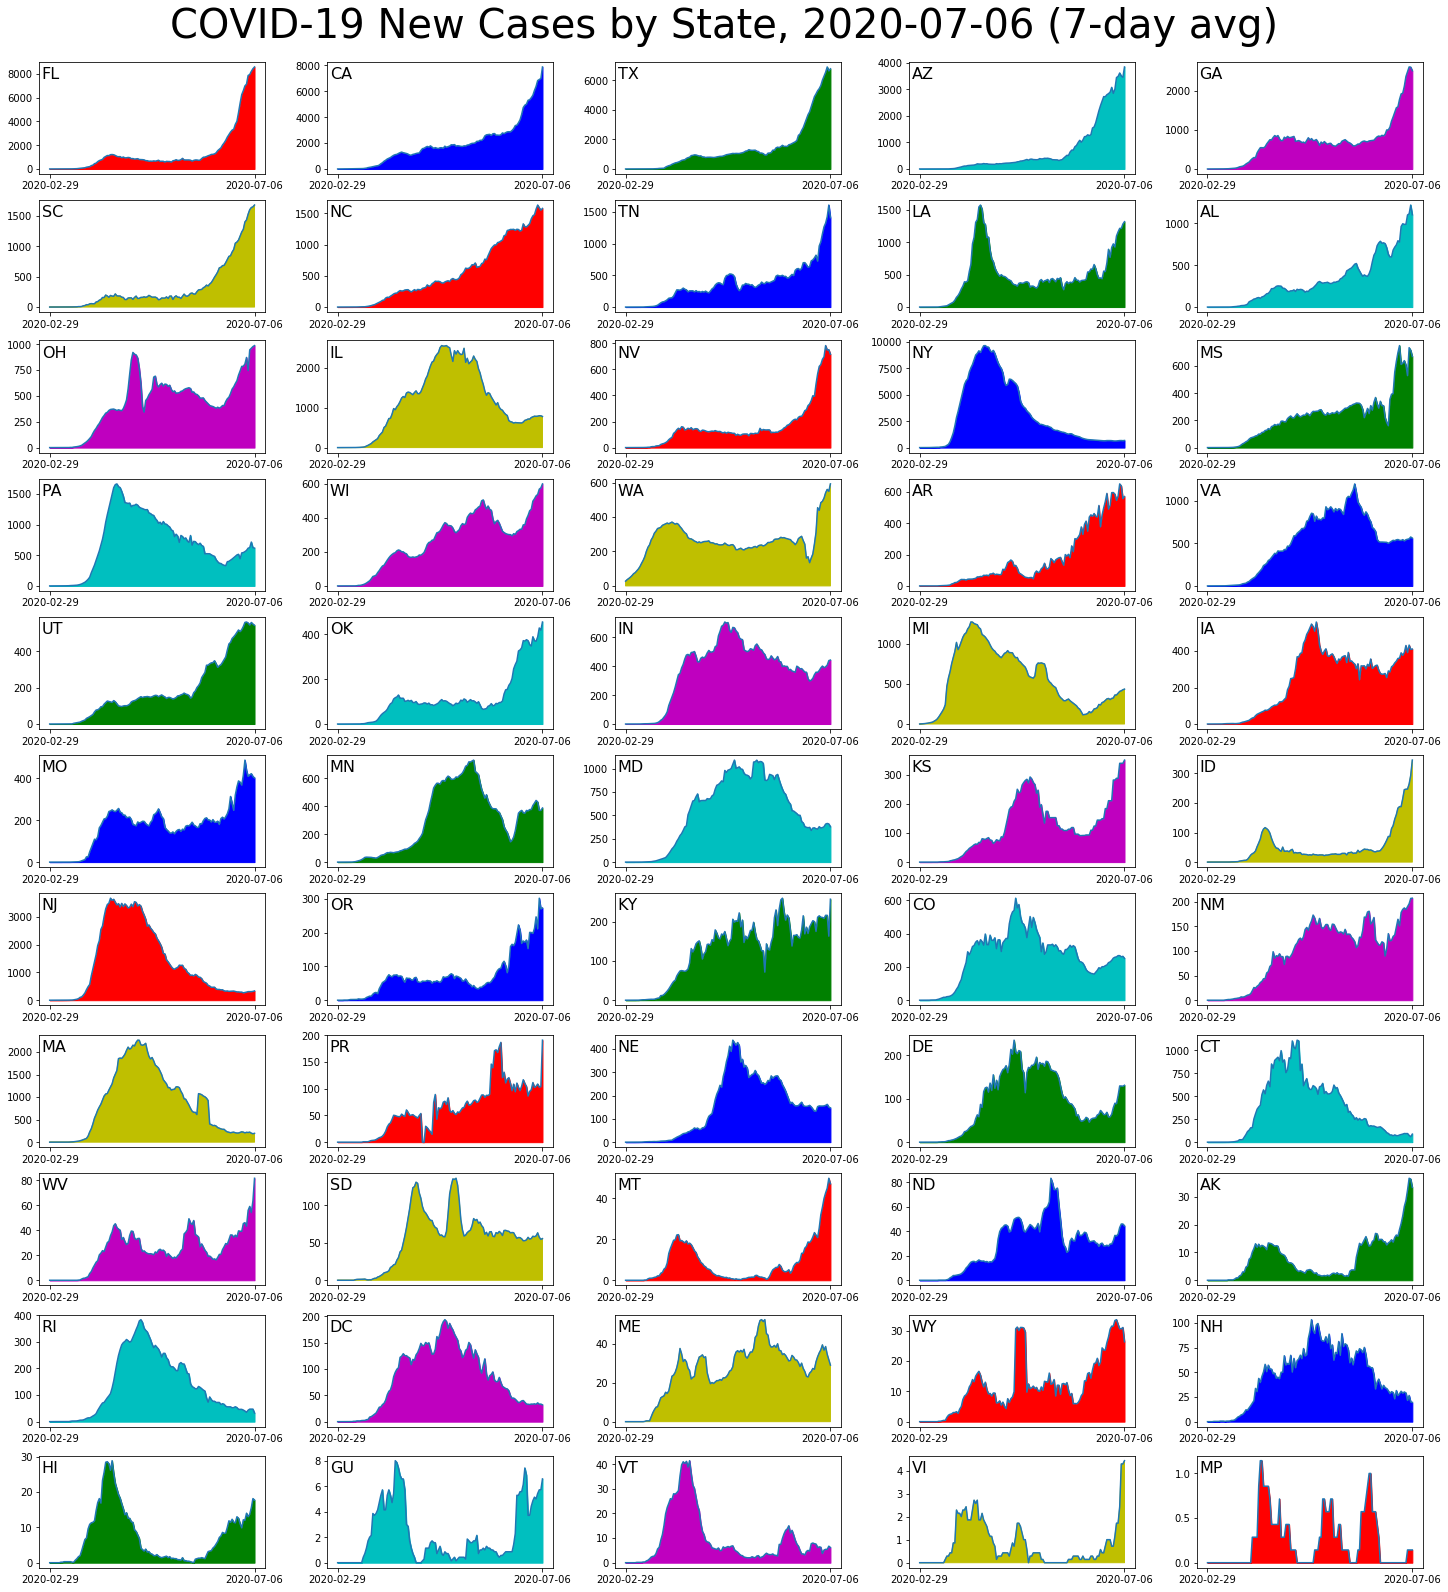

In [87]:
covidtracking = pd.read_csv('../other3p/covidtracking_daily.csv')
covidtracking['date'] = pd.to_datetime(covidtracking['date'],format="%Y%m%d")
maxDate = max(covidtracking['date'])
#increase = covidtracking.pivot(index='date',columns='state', values='positiveIncrease')
confirmed = covidtracking.pivot(index='date',columns='state', values='positive')

increase = {}
line = {}
window = 7
dates = confirmed.index #[window:]
for c in confirmed:
    cnf = confirmed[c].fillna(0)    
    line[c]=[0]*window+[max(0,(cnf[j]-cnf[j-window])/window) for j in range(window,len(cnf))]
    increase[c]=[0]+[max(0,(cnf[j]-cnf[j-1])) for j in range(1,len(cnf))]

#deaths = covidtracking.pivot(index='date',columns='state', values='death')
#offset = 18

#df = df[[c for c in df.columns if df[c].max()>1000]]

maxDate=max(confirmed.index)

offset=38

from math import ceil

def plotBars(countries):
    cols = 5
    colors = ['r', 'b', 'g', 'c', 'm', 'y' 'k']
    plt.rcParams["figure.figsize"] = [20, 2*int(len(countries)/cols)]    
    fig, axs = plt.subplots(ceil(len(countries)/cols),cols,constrained_layout=True)
    for (i,country) in enumerate(countries):
        color = colors[int(i%len(colors))]
        ax = axs[int(i/cols), int(i%cols)]
        ax.plot(dates[offset:],line[country][offset:])
        ax.fill_between(dates[offset:], line[country][offset:], color=color)
        #ax.bar(confirmed.index,recovered, color='red')
        ax.text(0.01,0.85,country, transform=ax.transAxes, ha='left', size=16)
        ax.set_xticks([dates[offset],dates[-1]])
        #ax.tick_params(axis = 'x', which = 'major', labelsize = 16)
        #ax.tick_params(axis = 'y', which = 'major', labelsize = 14)
    fig.suptitle('COVID-19 New Cases by State, {} ({}-day avg)'.format(maxDate.strftime('%Y-%m-%d'), window),size=40)        

del line['AS']
statesToPlot = sorted(line, key=lambda c: line[c][-1], reverse=True)
#for s in ['WA','GA', 'OR']:
#    if s not in statesToPlot:
#        statesToPlot.append(s)

#plotBars(['WA','NY','CA','NJ','MA','LA','FL'])
plotBars(statesToPlot)

#print(maxDate)
save_figure(maxDate,'60_newcases_small.png')

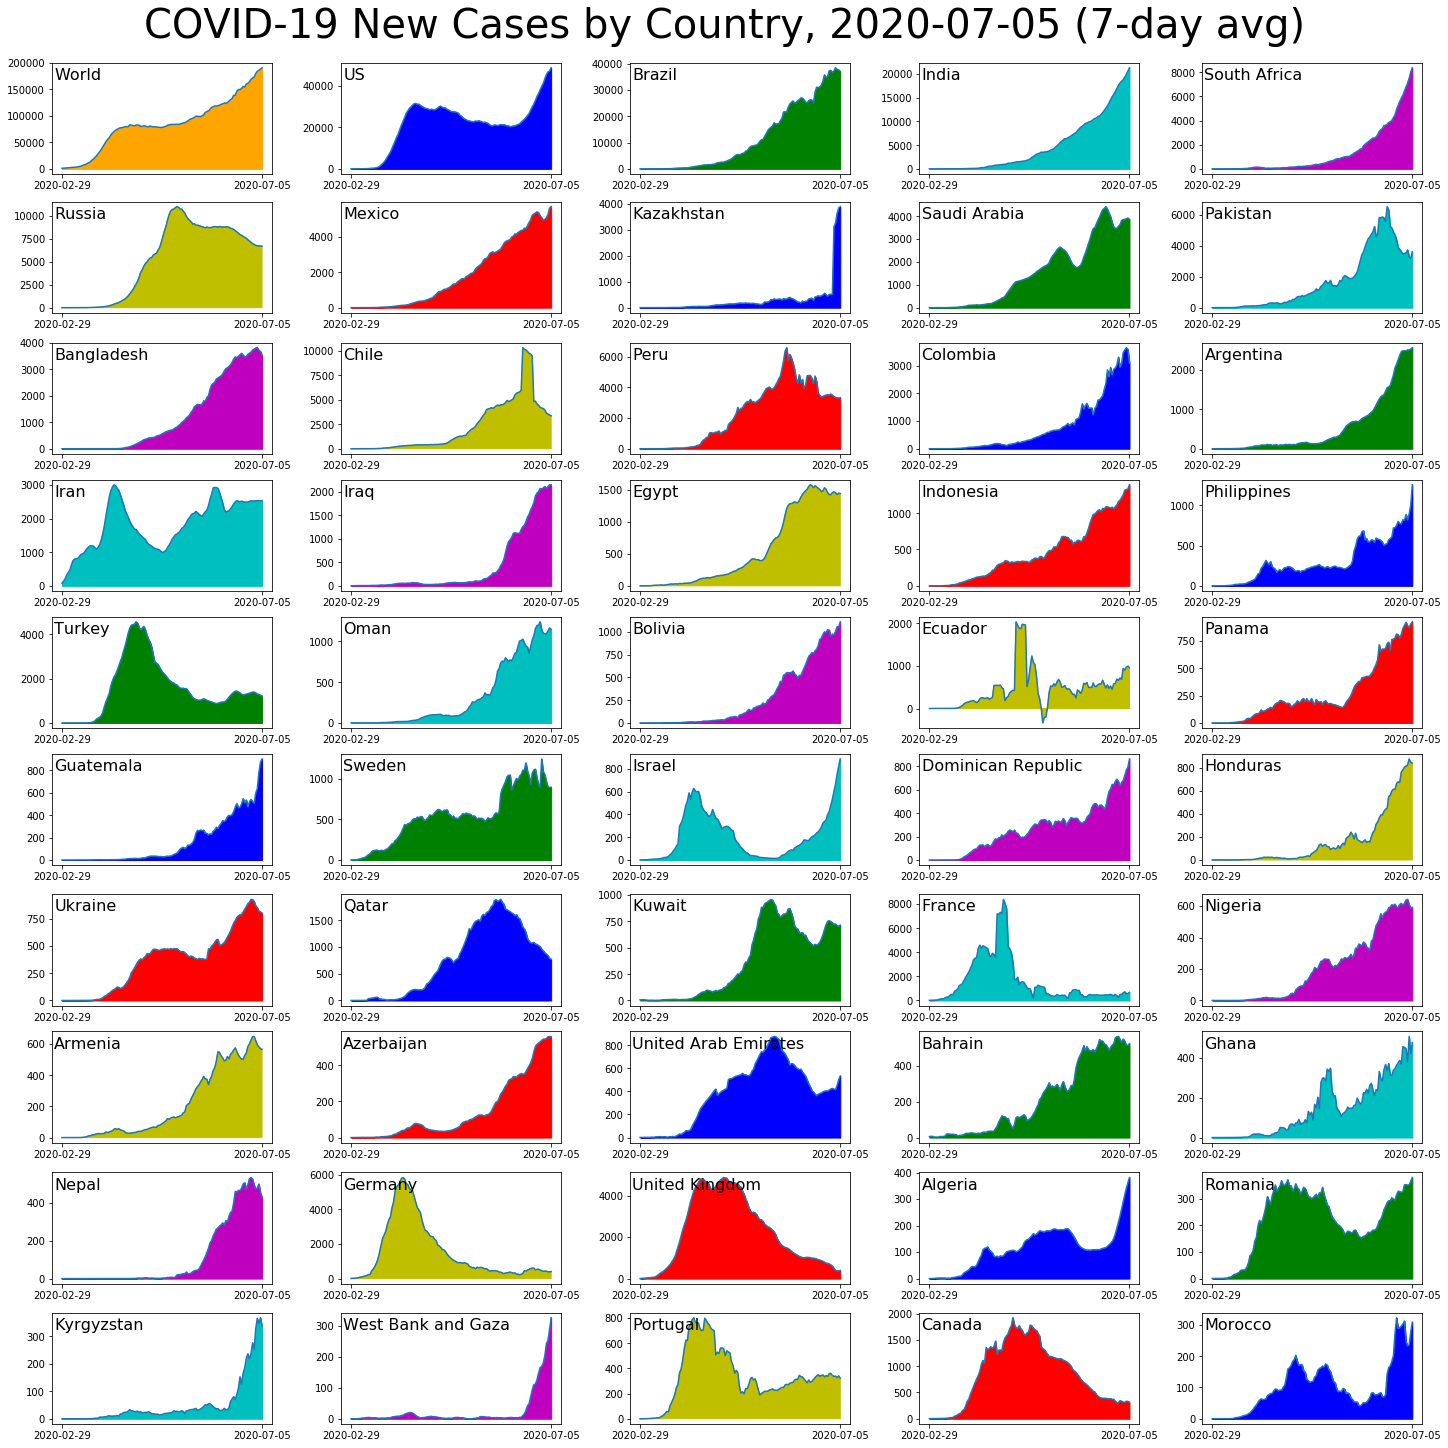

In [88]:
df = raw
#df['Region']= (df['Province/State'].fillna('')+', '+df['Country/Region']).apply(lambda x: x if x[0]!=',' else x[2:])
df['Region'] = df['Country/Region']
#print(df['Region'])
df=df.groupby('Region').sum()

# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]
#threshold=50
#df = df[df[last_date]>threshold]
#df = df[df.index.isin(['US','France','Germany','Italy','Spain'])]
#df = df.groupby(df.index=='US').sum()
#df.index = ['World']

df['Region']=df.index
df=df.melt(id_vars='Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Region')
df['date']=pd.to_datetime(df.index)

df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]

line={'World':[0]*len(df['Canada'])}
df['World'] = [0]*len(df['Canada'])
window = 7
for c in df.columns:
    if c=='World':
        continue
    line[c] = [0]*window+[(df[c][i]-df[c][i-window])/window for i in range(window,len(df[c]))]
    df[c] = [0]+[(df[c][i]-df[c][i-1]) for i in range(1,len(df[c]))]
    line['World'] = np.add(line['World'],line[c])    
    df['World'] = np.add(df['World'],df[c])
    #print(line[c],line['World'])

#df = df[countries]
#print(df.columns)
countries=df.columns
# Jan 22 is the start. So index from 38: for March 1 
offset = 38
dates=df.index[offset:]
maxDate = max(df.index)



from math import ceil

def plotBars(countries):
    cols = 5
    colors = ['r', 'b', 'g', 'c', 'm', 'y' 'k']
    plt.rcParams["figure.figsize"] = [20, 2*int(len(countries)/cols)]    
    fig, axs = plt.subplots(ceil(len(countries)/cols),cols,constrained_layout=True)
    for (i,country) in enumerate(countries):
        color = colors[int(i%len(colors))]
        color = 'orange' if country == 'World' else color
        ax = axs[int(i/cols), int(i%cols)]
        ax.plot(dates,line[country][offset:])
        ax.fill_between(dates, line[country][offset:], color=color)
        #ax.bar(confirmed.index,recovered, color='red')
        ax.text(0.01,0.85,country, transform=ax.transAxes, ha='left', size=16)
        ax.set_xticks([dates[0],dates[-1]])
        #ax.tick_params(axis = 'x', which = 'major', labelsize = 16)
        #ax.tick_params(axis = 'y', which = 'major', labelsize = 14)
    fig.suptitle('COVID-19 New Cases by Country, {} ({}-day avg)'.format(maxDate.strftime('%Y-%m-%d'), window),size=40)        

#del line['AS']
maxCountries = 50
countries = sorted(line, key=lambda c: line[c][-1], reverse=True)[:maxCountries]
#for s in ['WA','GA', 'OR']:
#    if s not in statesToPlot:
#        statesToPlot.append(s)

#plotBars(['WA','NY','CA','NJ','MA','LA','FL'])
plotBars(countries)

save_figure(maxDate,'60_newcases_country_small.png')

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/26/20', '6/27/20', '6/28/20', '6/29/20', '6/30/20', '7/1/20',
       '7/2/20', '7/3/20', '7/4/20', '7/5/20'],
      dtype='object', length=166)


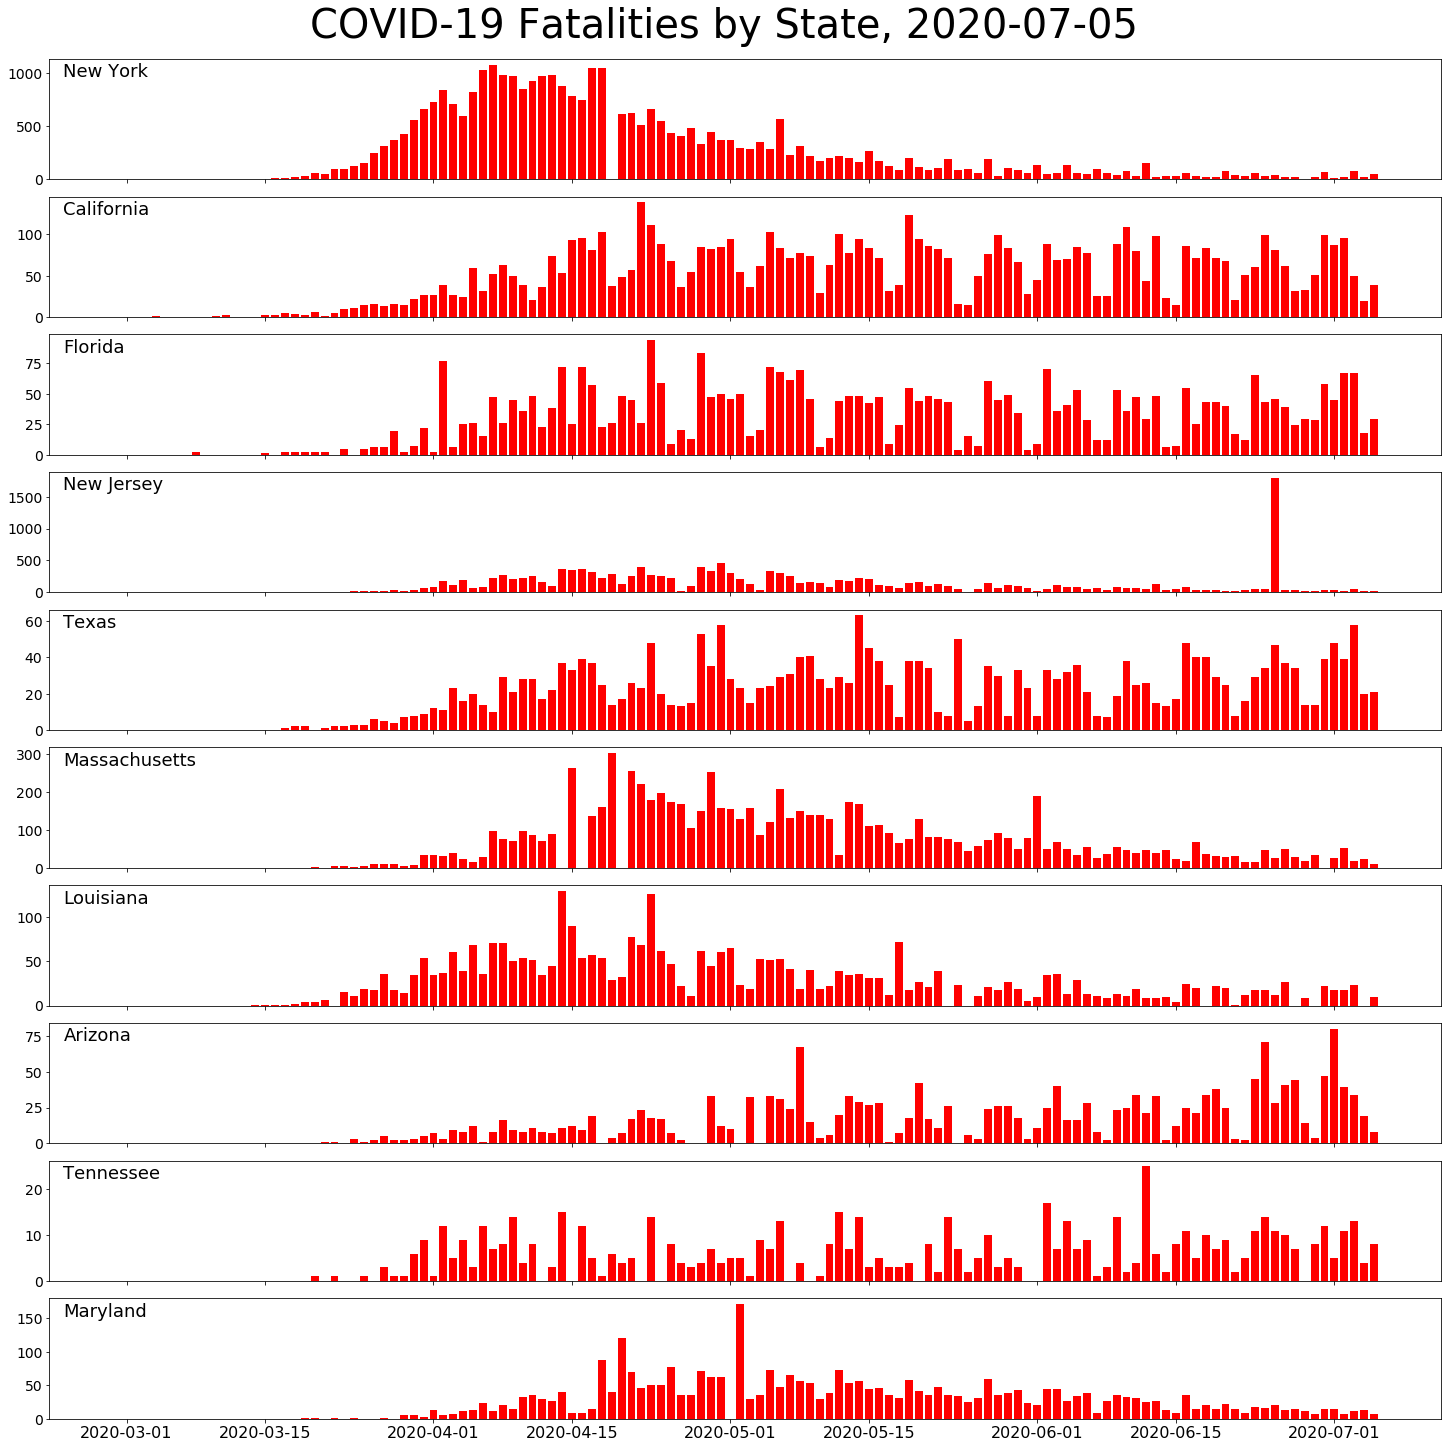

In [89]:
us_deaths = load_raw_us('time_series_covid19_deaths_us.csv')
df = us_deaths
ix = df['Province_State']
df = df[df.columns[12:]]
df.index = ix
print(df.columns)
df=df.groupby('Province_State').sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]

df['State']=df.index
df=df.melt(id_vars='State',var_name='date', value_name='Confirmed').pivot(index='date',columns='State')
df['date']=pd.to_datetime(df.index)

df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
for c in ['Recovered', 'Diamond Princess', 'Grand Princess']:
    if c in df:
        del df[c] 

window = 1
for c in df.columns:
    df[c] = [0]*window+[max(0,(df[c][i]-df[c][i-window])/window) for i in range(window,len(df[c]))]
    
#df = df[[c for c in sorted(df.columns, key=lambda x: df[x][-1], reverse=True)[:10]+['Australia','New Zealand']]]
countries=sorted(df.columns, key=lambda x: df[x][-1], reverse=True)[0:10]
# Jan 22 is the start. So index from 38: for March 1 
offset = 38
dates=df.index[offset:]
maxDate = max(df.index)
plt.rcParams["figure.figsize"] = [20, 2*len(countries)]
fig, axs = plt.subplots(len(countries),1, sharex=True,constrained_layout=True)
for (i,(country,ax)) in enumerate(zip(countries,axs)):
    ax.bar(dates,df[country][offset:], color='red')
    #ax.bar(confirmed.index,recovered, color='red')
    ax.text(0.01,0.85,country, transform=ax.transAxes, ha='left', size=18)
    ax.tick_params(axis = 'x', which = 'major', labelsize = 16)
    ax.tick_params(axis = 'y', which = 'major', labelsize = 14)
    
fig.suptitle('COVID-19 Fatalities by State, {}'.format(maxDate.strftime('%Y-%m-%d')),size=40)        
    

save_figure(maxDate,'21_fatalities_state.png')

NameError: name 'fig' is not defined

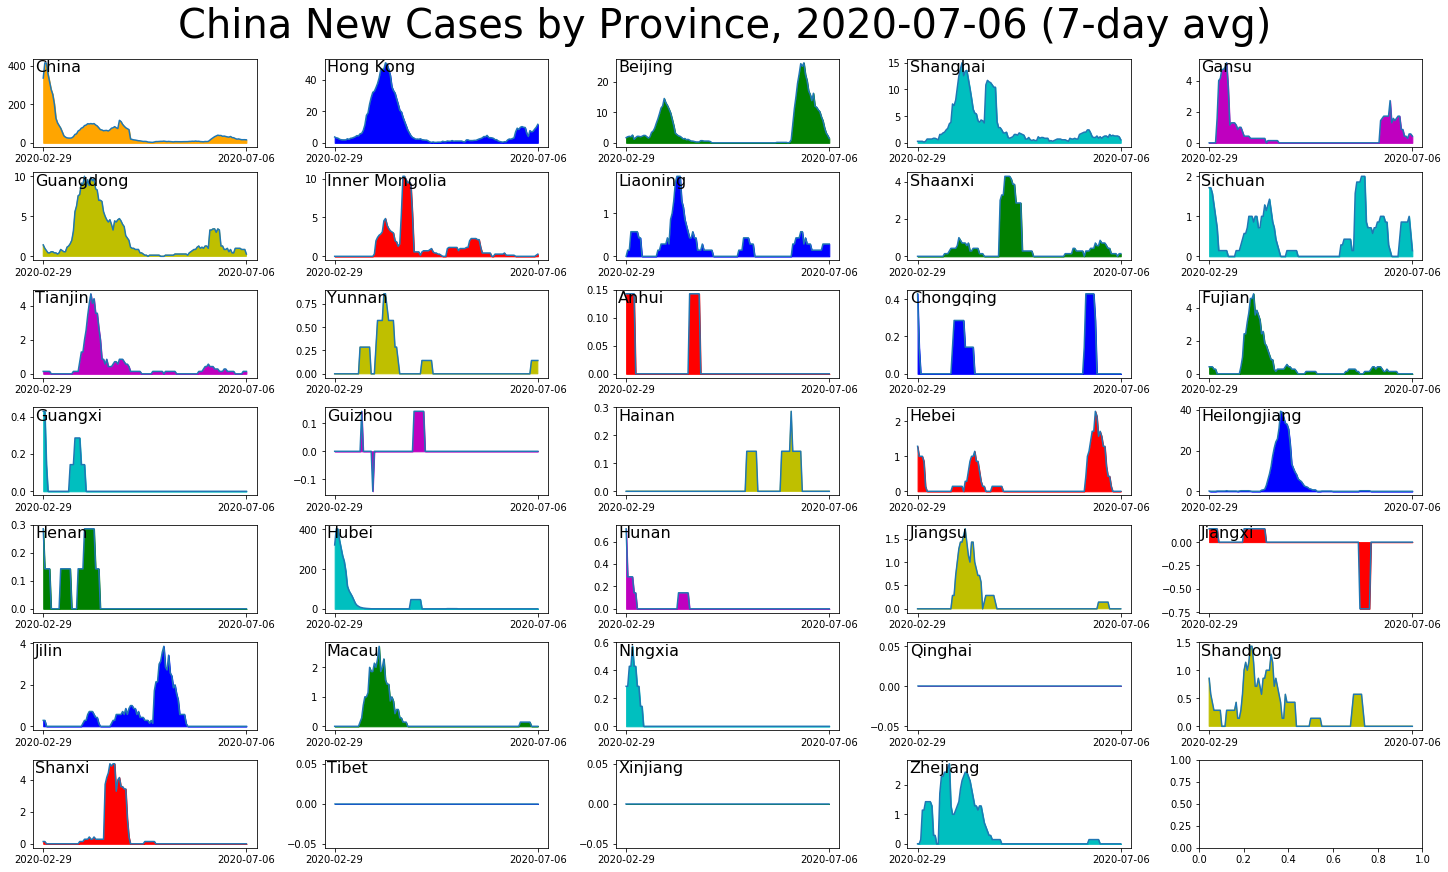

In [7]:
df = raw
#df['Region']= (df['Province/State'].fillna('')+', '+df['Country/Region']).apply(lambda x: x if x[0]!=',' else x[2:])
df = df[df['Country/Region']=='China'] 
#print(df['Region'])
df=df.groupby('Province/State').sum()

# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]
#threshold=50
#df = df[df[last_date]>threshold]
#df = df[df.index.isin(['US','France','Germany','Italy','Spain'])]
#df = df.groupby(df.index=='US').sum()
#df.index = ['World']

df['Province']=df.index
df=df.melt(id_vars='Province',var_name='date', value_name='Confirmed').pivot(index='date',columns='Province')
df['date']=pd.to_datetime(df.index)

df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]

line={'China':[0]*len(df['Beijing'])}
df['China'] = [0]*len(df['Beijing'])
window = 7
for c in df.columns:
    if c=='China':
        continue
    line[c] = [0]*window+[(df[c][i]-df[c][i-window])/window for i in range(window,len(df[c]))]
    df[c] = [0]+[(df[c][i]-df[c][i-1]) for i in range(1,len(df[c]))]
    line['China'] = np.add(line['China'],line[c])    
    df['China'] = np.add(df['China'],df[c])
    #print(line[c],line['World'])

#df = df[countries]
#print(df.columns)
countries=df.columns
# Jan 22 is the start. So index from 38: for March 1 
offset = 38
dates=df.index[offset:]
maxDate = max(df.index)



from math import ceil

def plotBars(countries):
    cols = 5
    colors = ['r', 'b', 'g', 'c', 'm', 'y' 'k']
    plt.rcParams["figure.figsize"] = [20, 2*int(len(countries)/cols)]    
    fig, axs = plt.subplots(ceil(len(countries)/cols),cols,constrained_layout=True)
    for (i,country) in enumerate(countries):
        color = colors[int(i%len(colors))]
        color = 'orange' if country == 'China' else color
        ax = axs[int(i/cols), int(i%cols)]
        ax.plot(dates,line[country][offset:])
        ax.fill_between(dates, line[country][offset:], color=color)
        #ax.bar(confirmed.index,recovered, color='red')
        ax.text(0.01,0.85,country, transform=ax.transAxes, ha='left', size=16)
        ax.set_xticks([dates[0],dates[-1]])
        #ax.tick_params(axis = 'x', which = 'major', labelsize = 16)
        #ax.tick_params(axis = 'y', which = 'major', labelsize = 14)
    fig.suptitle('China New Cases by Province, {} ({}-day avg)'.format(maxDate.strftime('%Y-%m-%d'), window),size=40)        

#del line['AS']
maxCountries = 50
countries = sorted(line, key=lambda c: line[c][-1], reverse=True)[:maxCountries]
#for s in ['WA','GA', 'OR']:
#    if s not in statesToPlot:
#        statesToPlot.append(s)

#plotBars(['WA','NY','CA','NJ','MA','LA','FL'])
plotBars(countries)


save_figure(maxDate,'60_newcases_china_small.png')